In [1]:
from salad.serialize import read
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_clusters(search_prefix, detector, snr, time_type, search_label):
    import re
    
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    clusters = list(p.rglob("clusters.pkl"))[0]
    gathered = list(
        sorted(
            filter(
                lambda x : re.compile("gathered_\d+.pkl").match(x.name) is not None,
                p.rglob("gathered*.pkl")
            ),
            key=lambda x : x.name
        )
    )
    dedup = list(p.rglob("deduplicated.pkl"))[0]
    filtered = list(p.rglob("filtered.pkl"))[0]
    
    
    return list(map(read, [clusters] + gathered + [dedup] + [filtered]))



In [9]:
clusters = get_clusters("new", 1, 3.0, "regular", "asteroid")

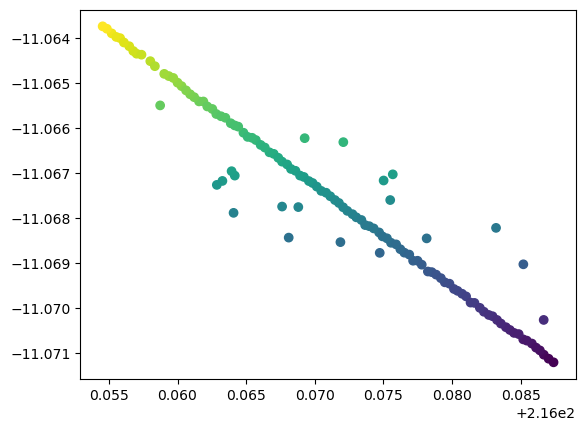

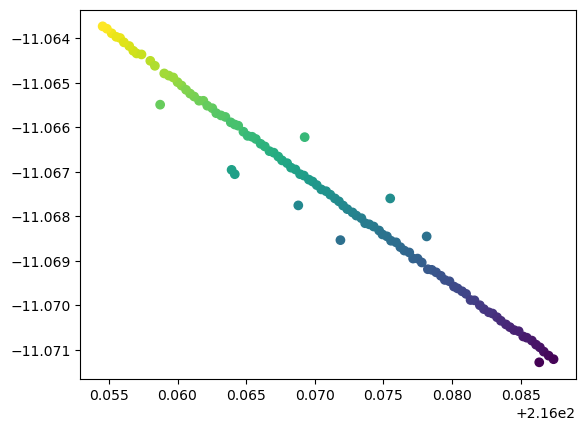

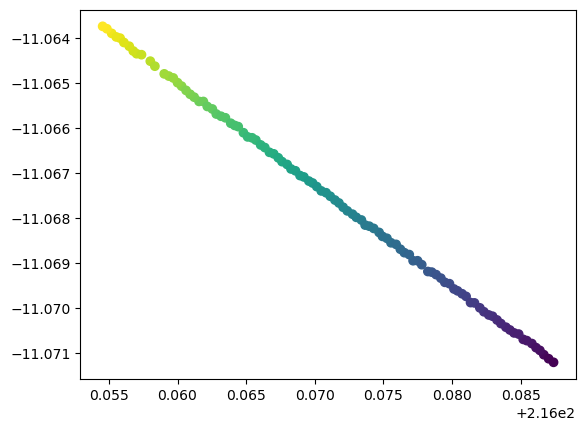

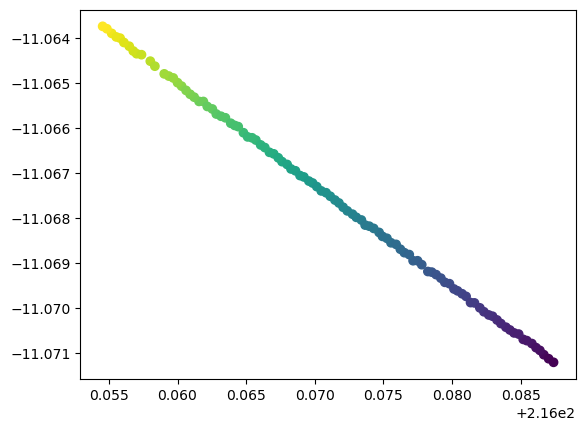

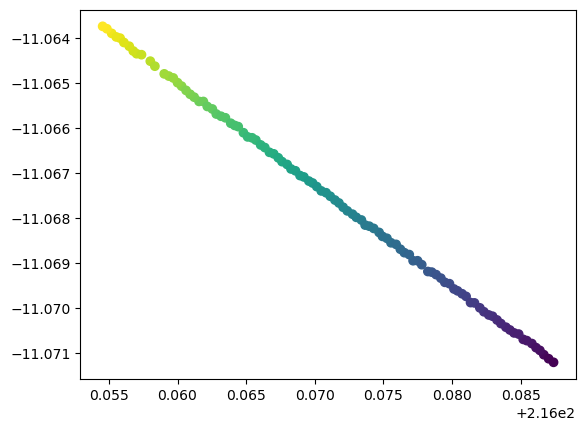

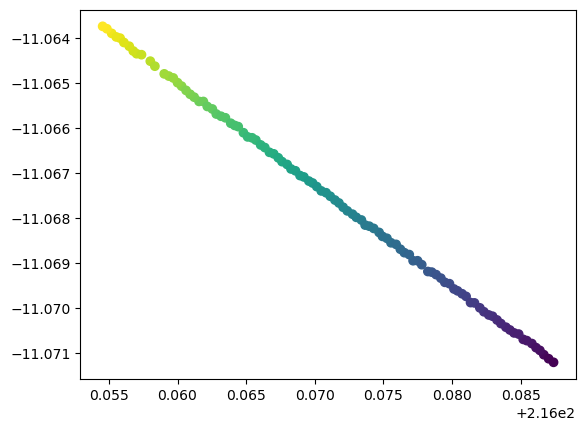

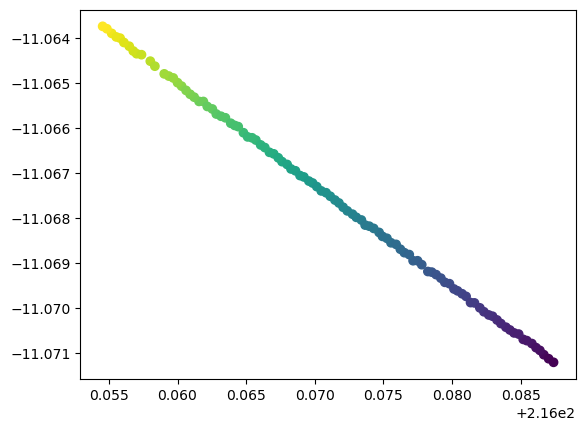

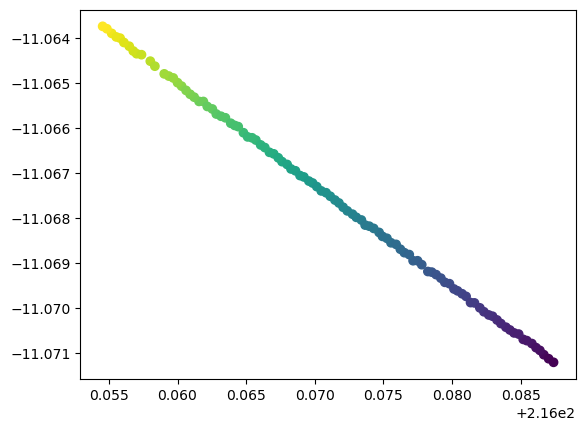

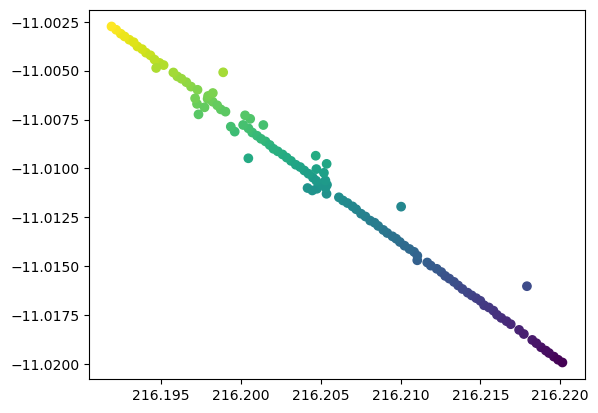

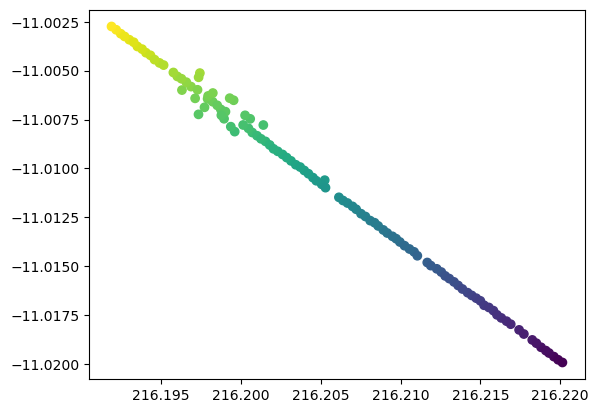

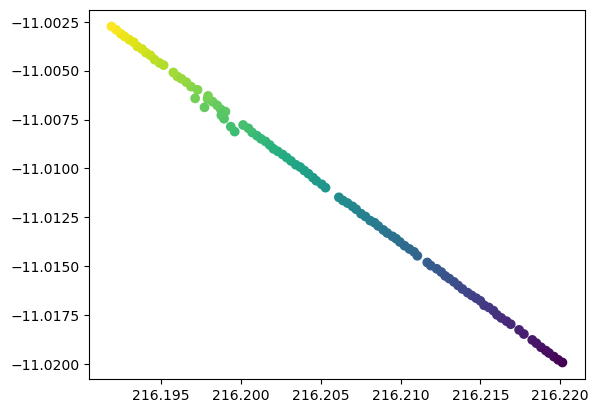

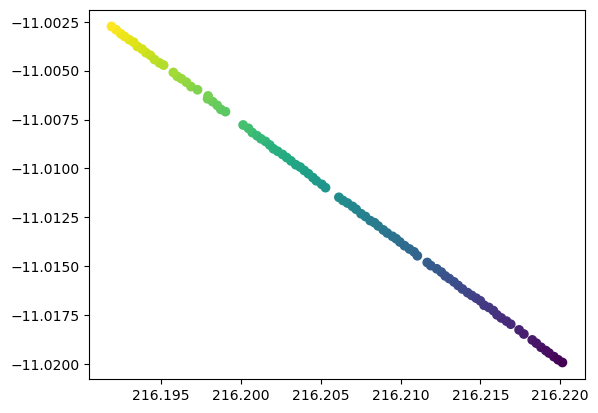

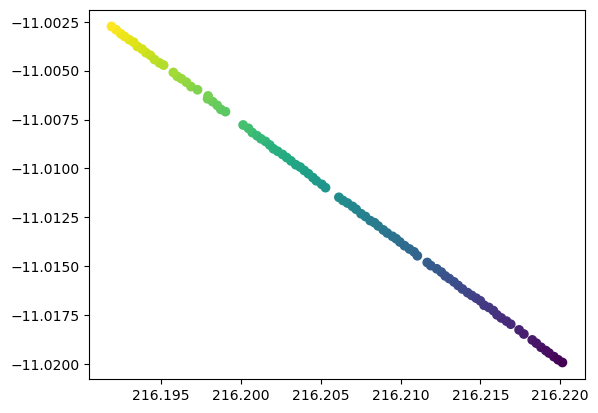

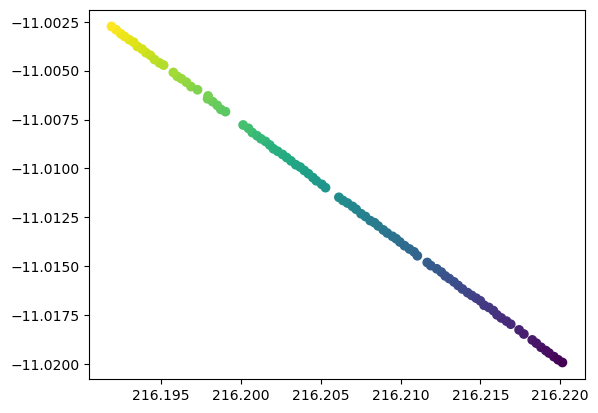

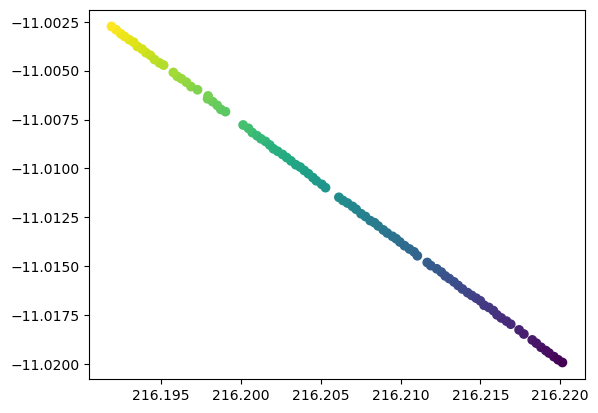

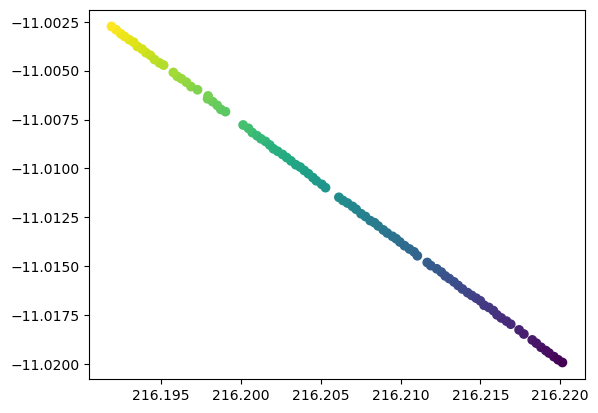

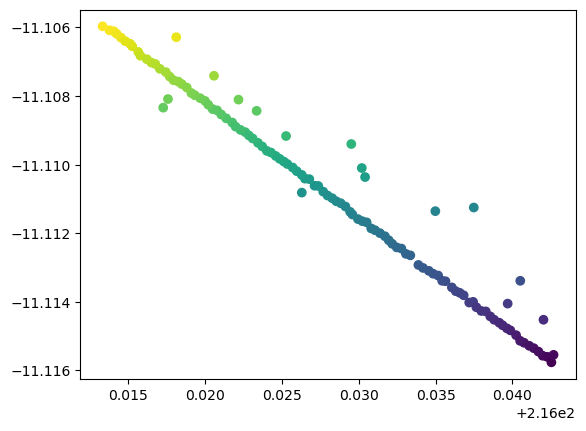

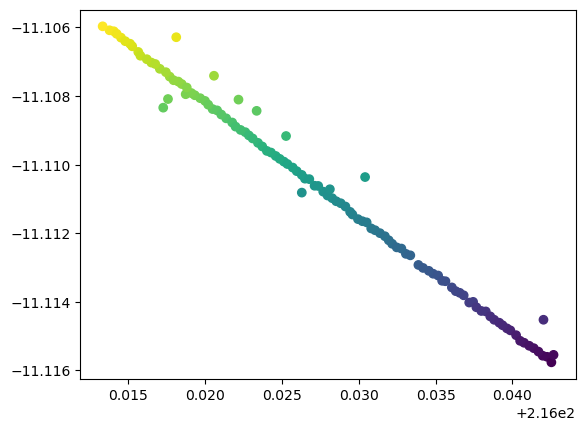

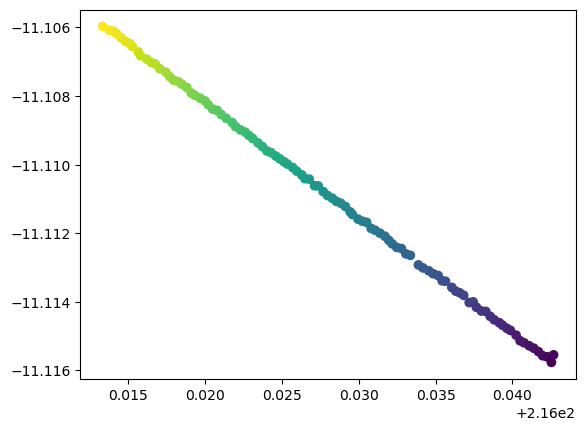

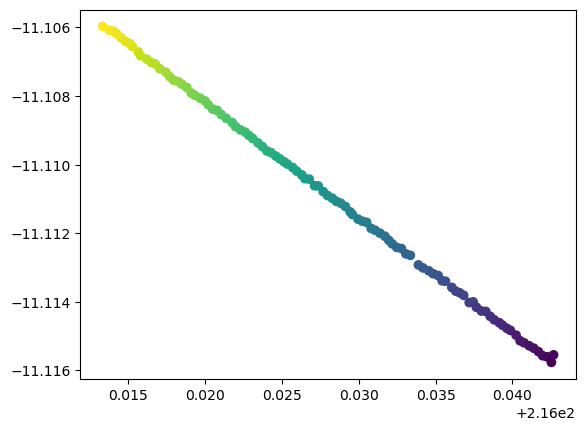

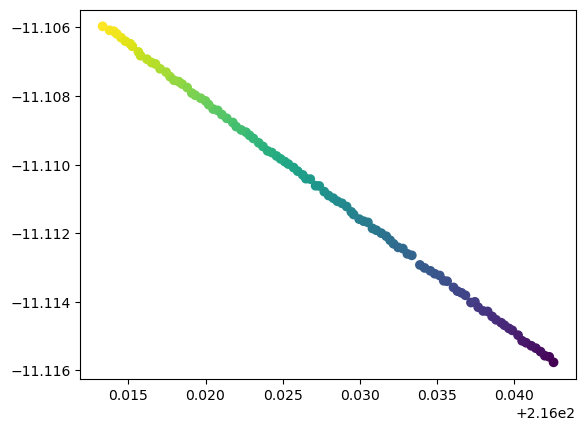

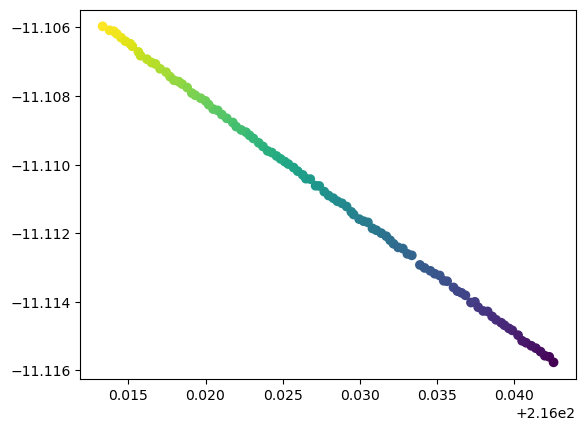

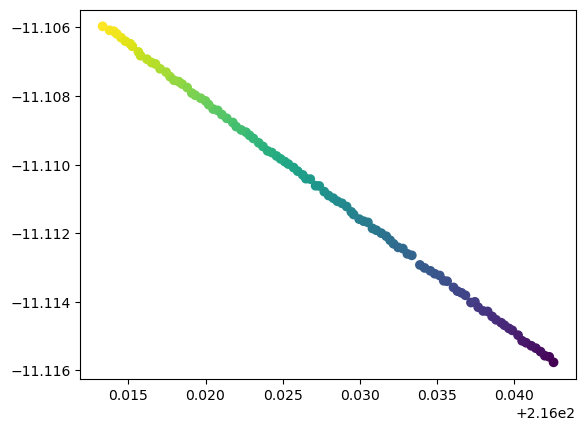

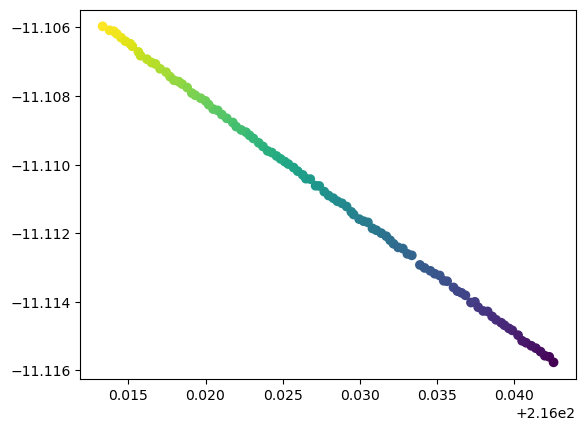

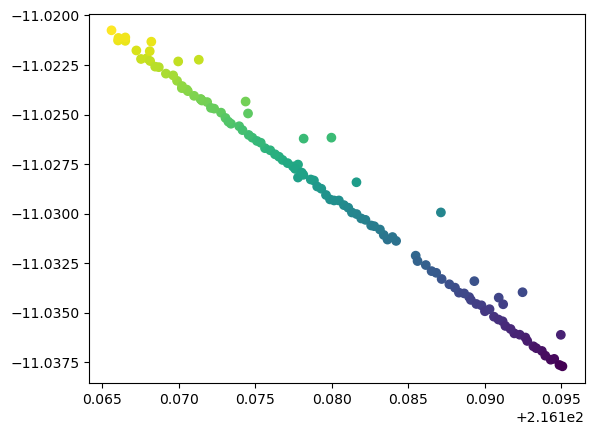

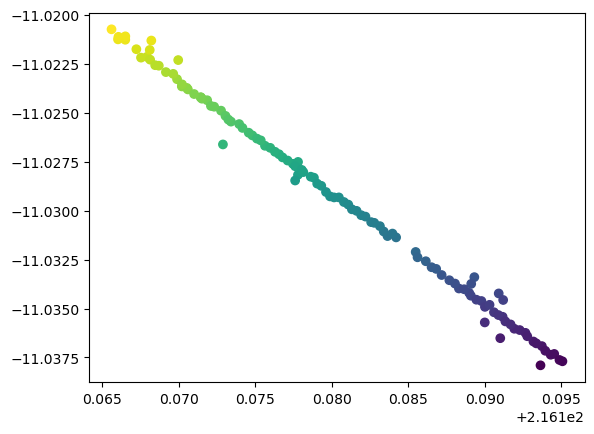

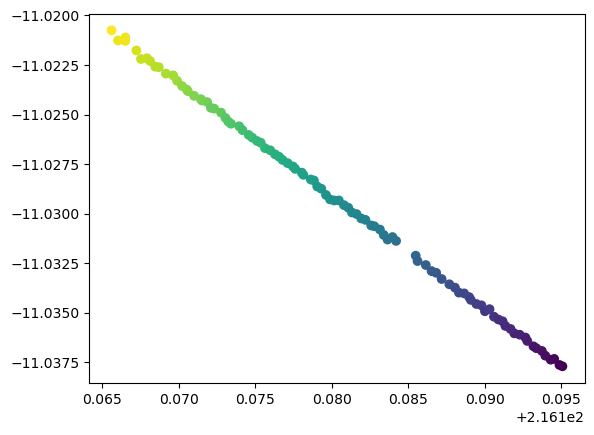

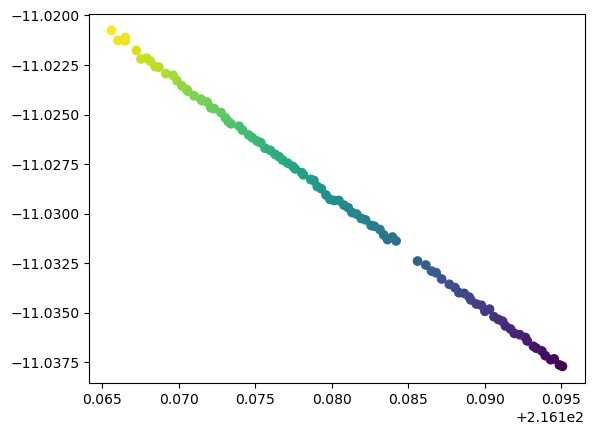

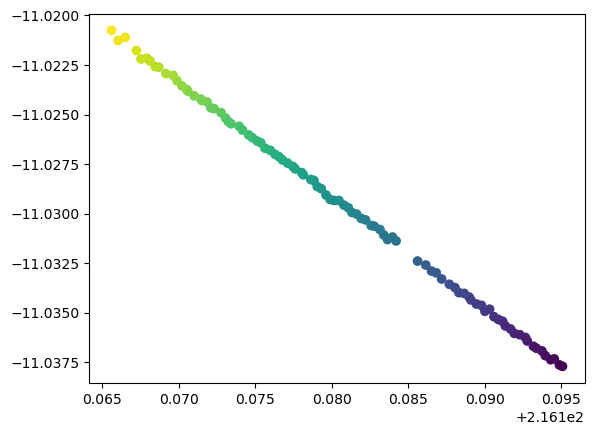

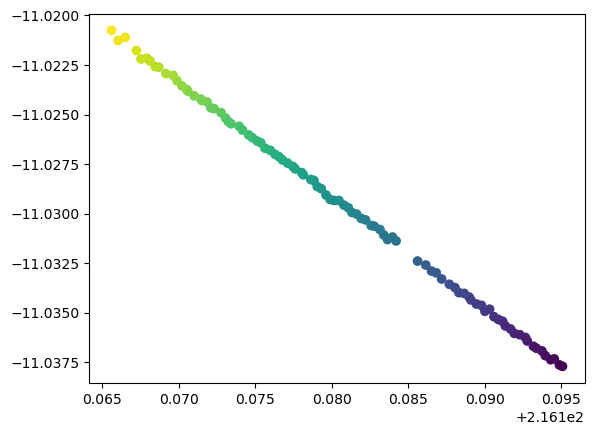

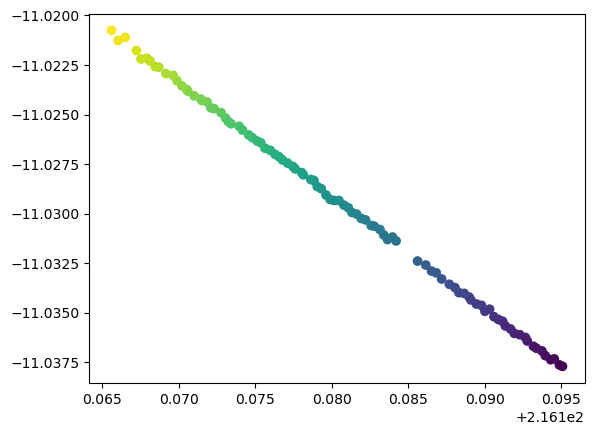

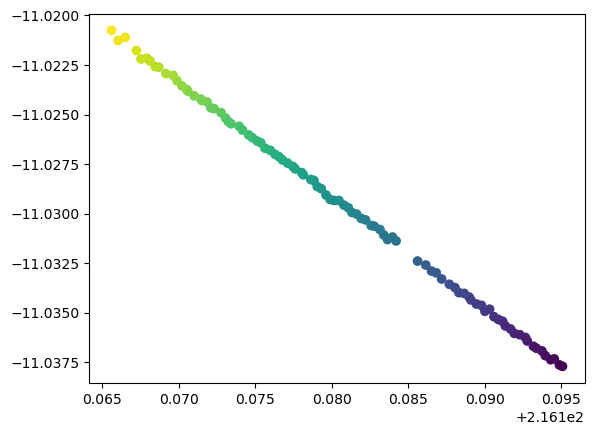

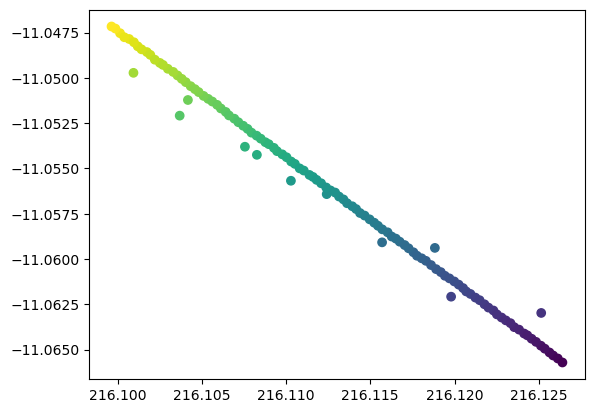

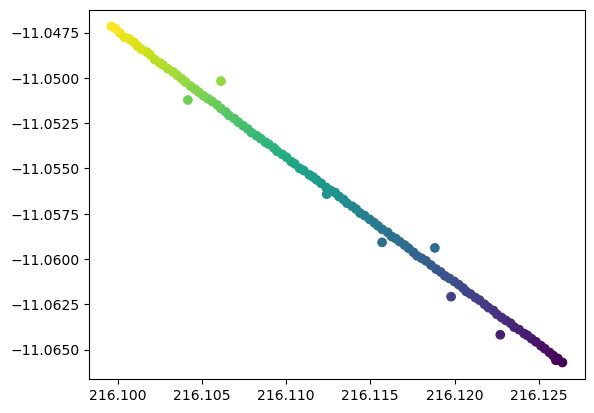

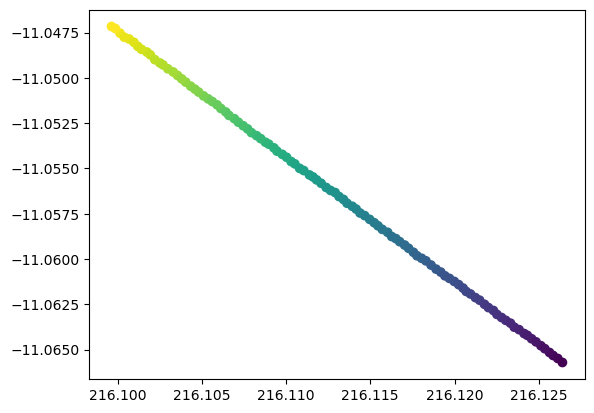

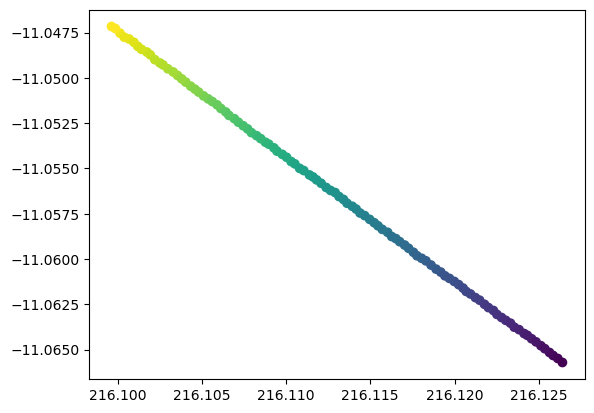

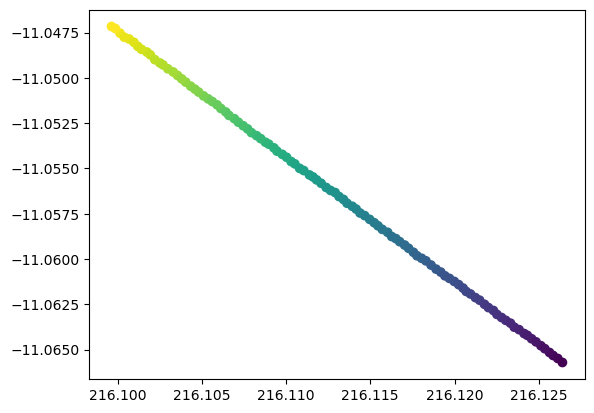

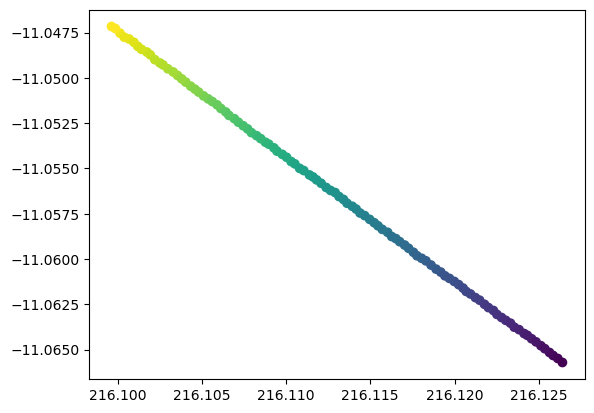

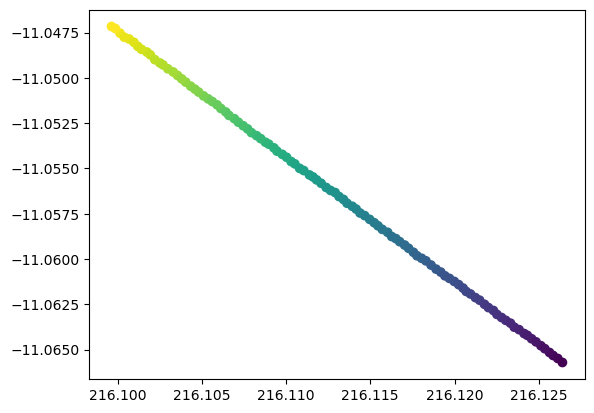

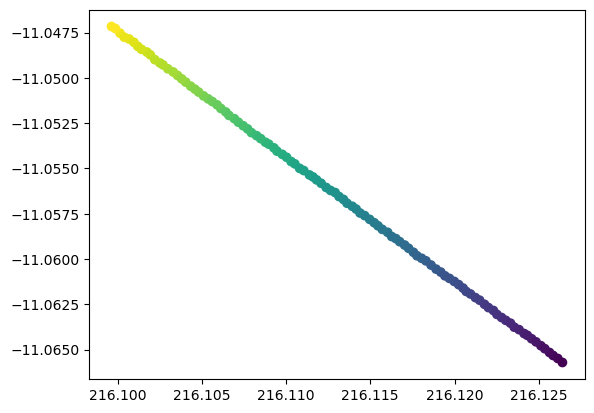

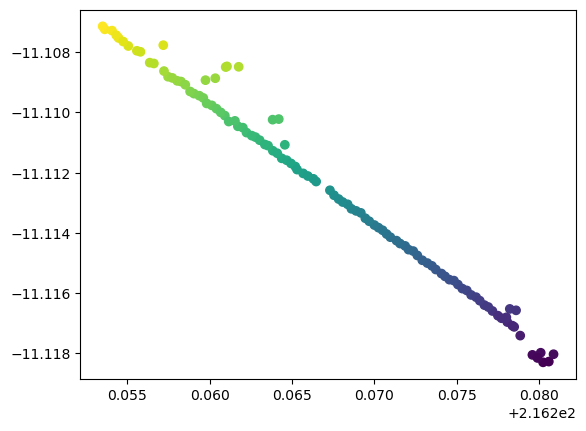

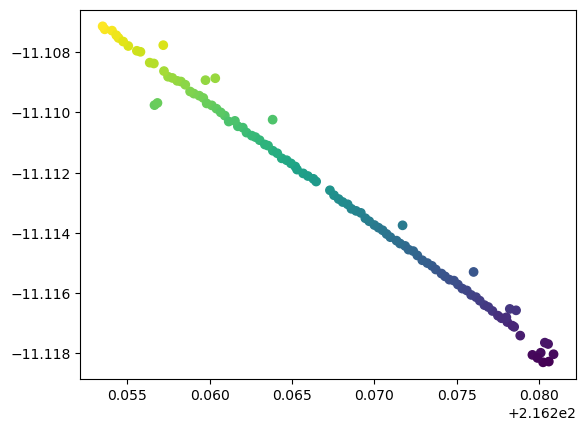

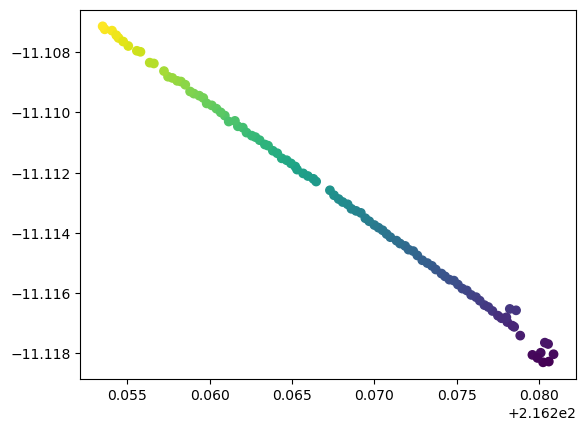

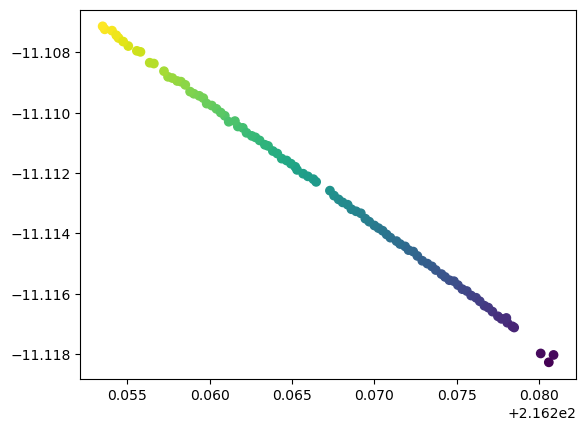

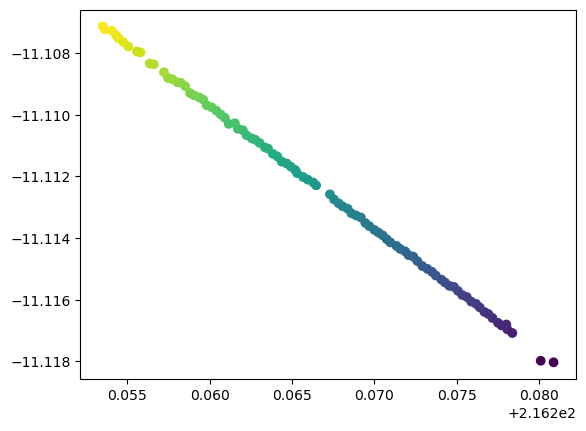

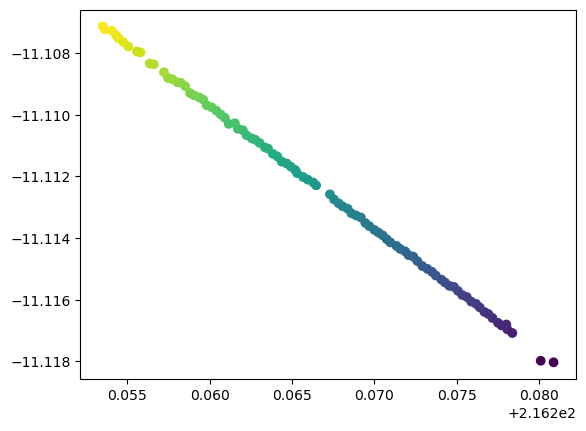

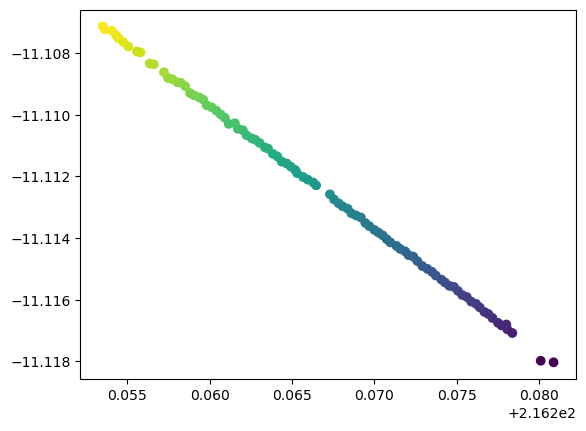

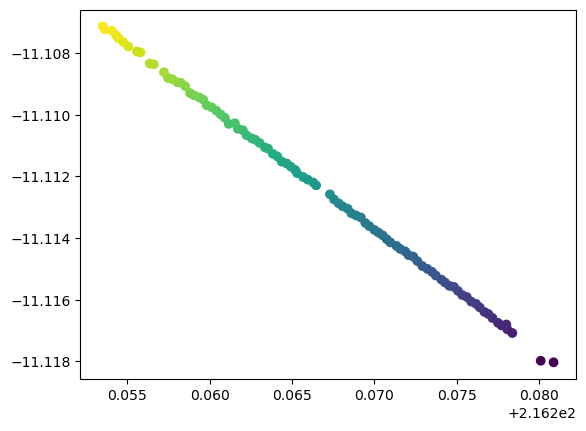

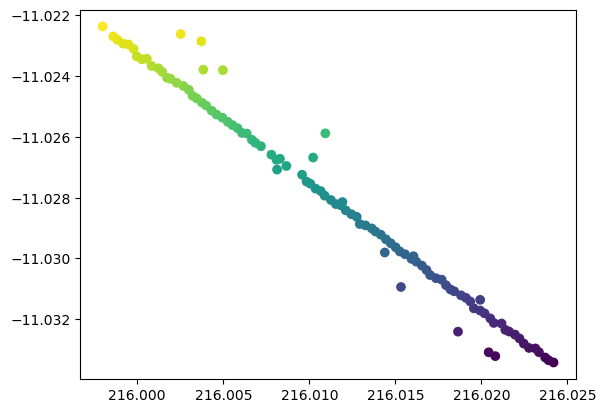

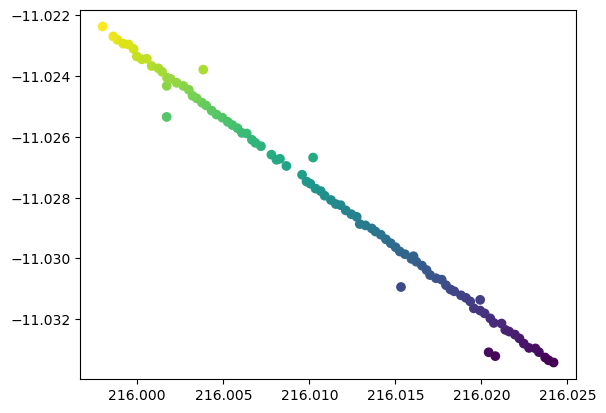

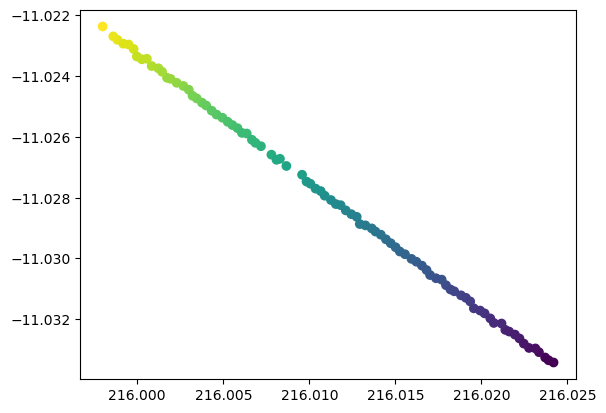

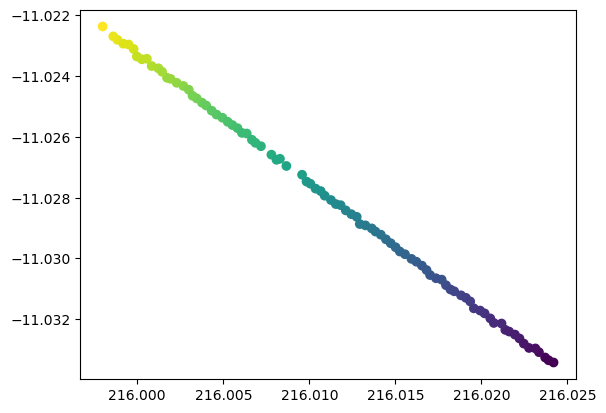

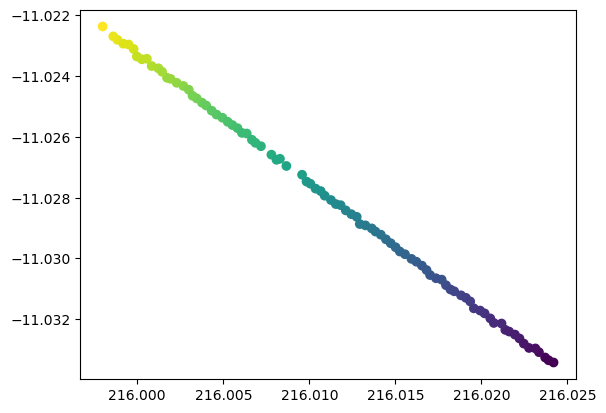

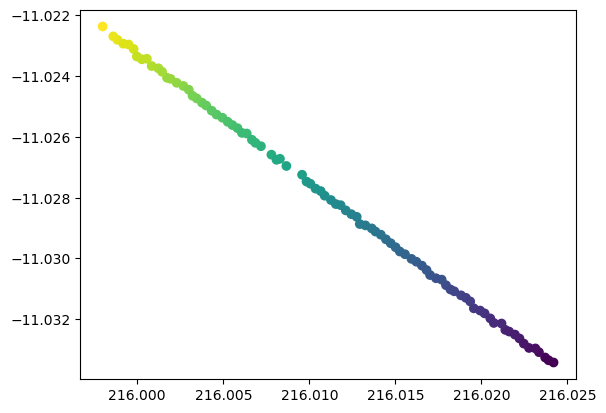

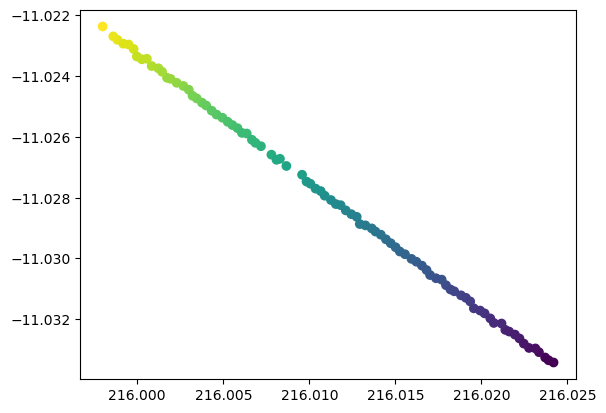

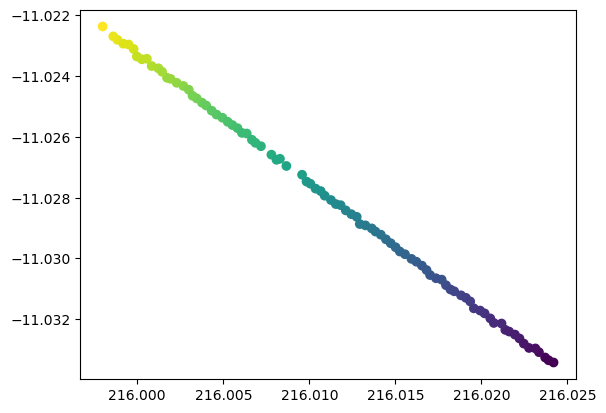

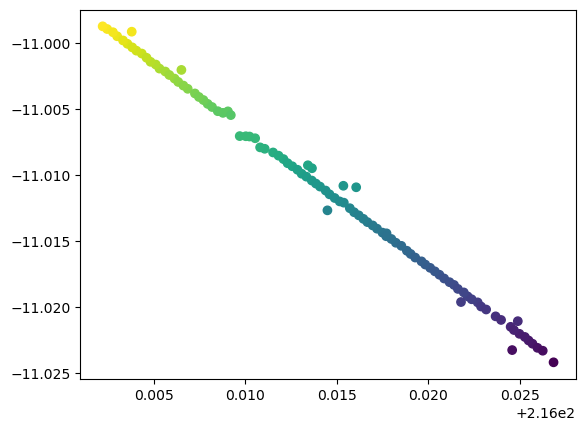

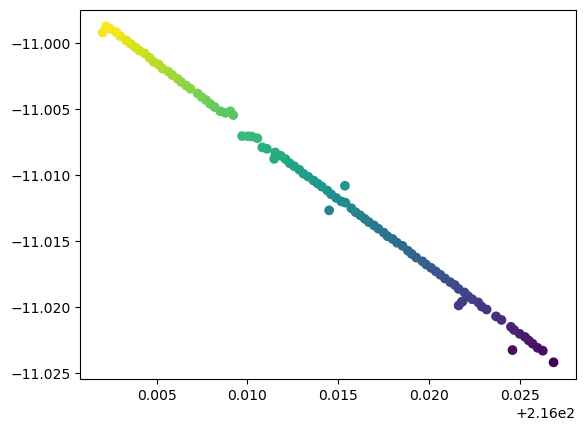

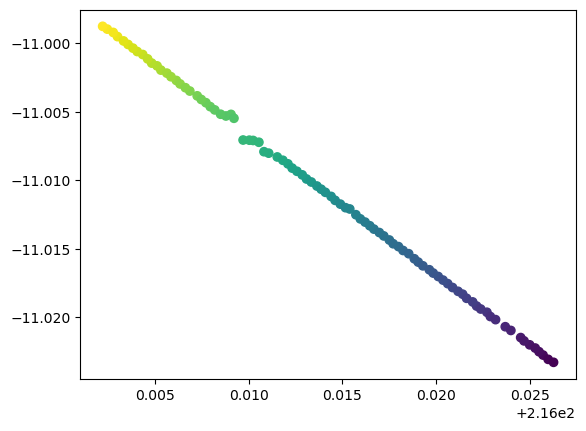

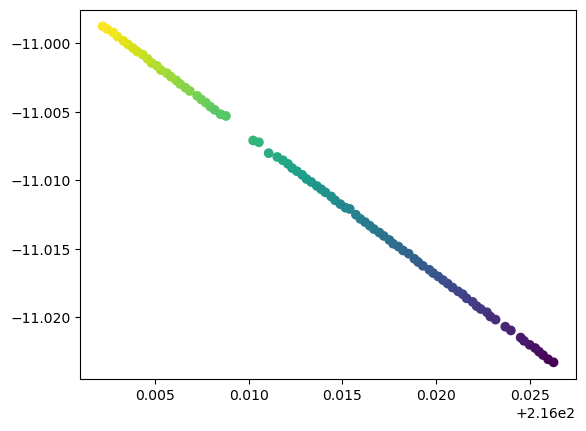

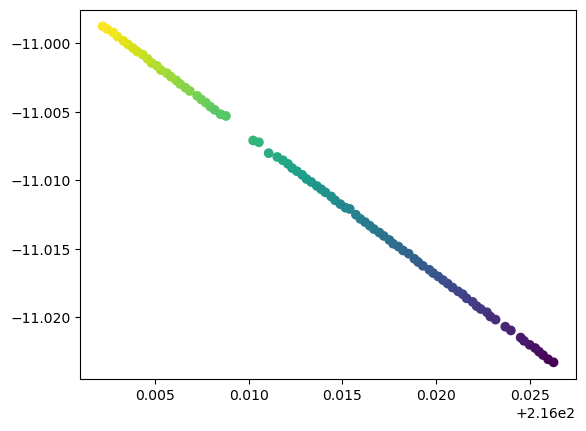

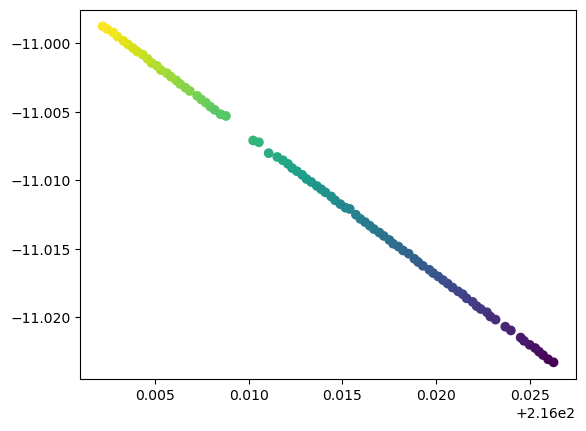

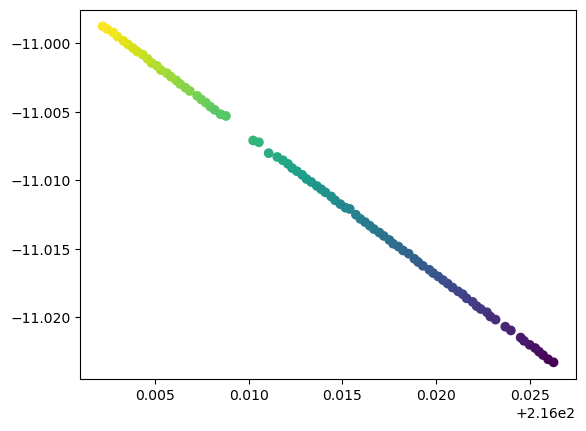

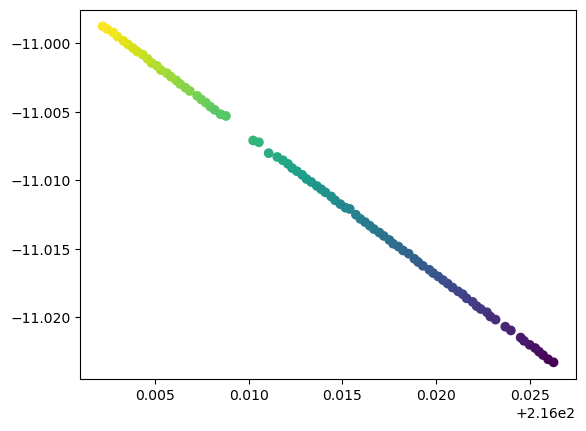

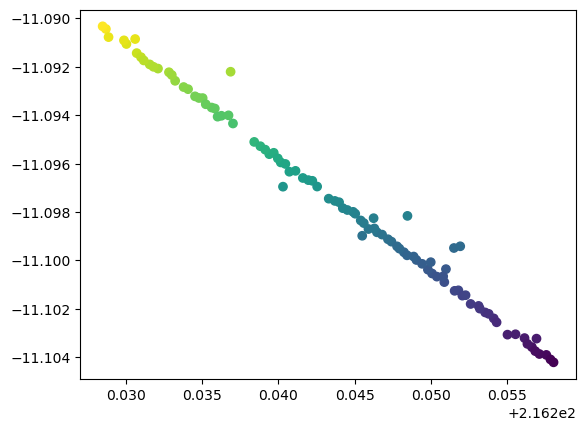

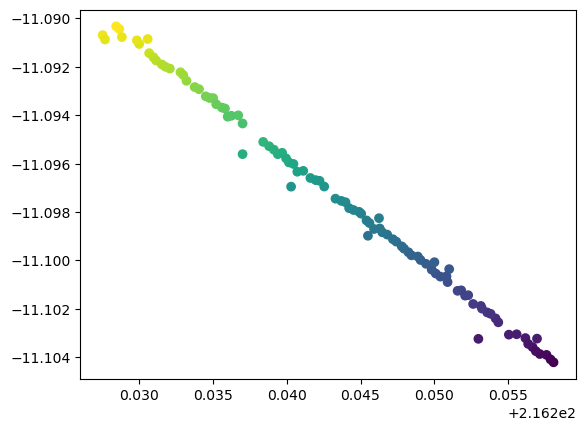

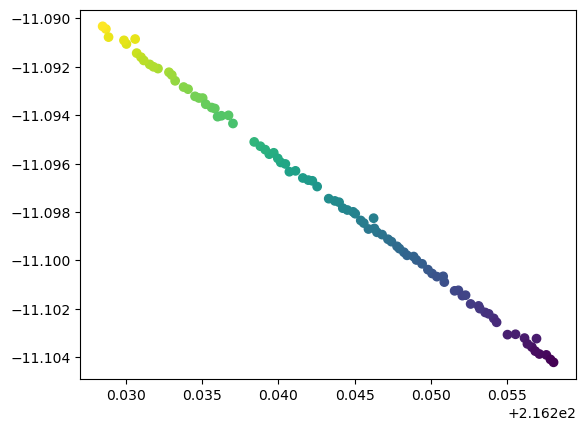

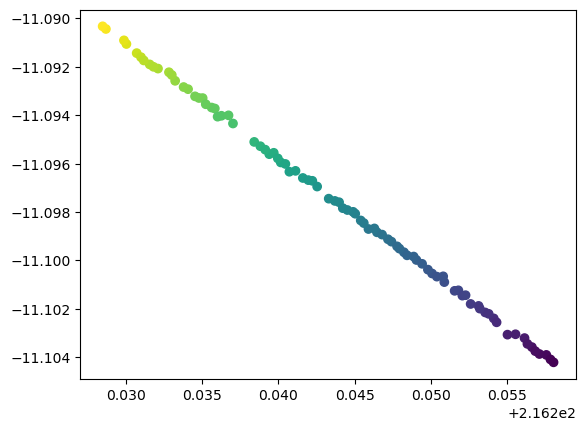

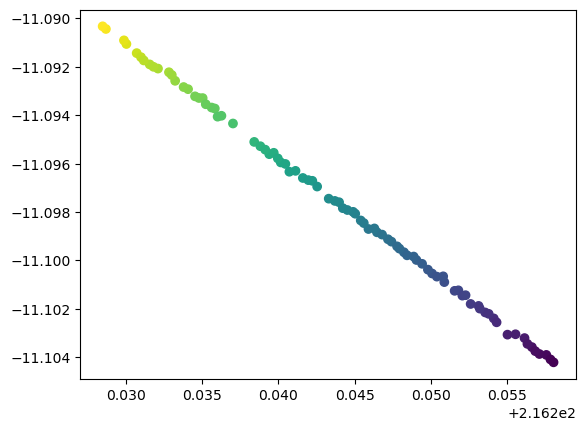

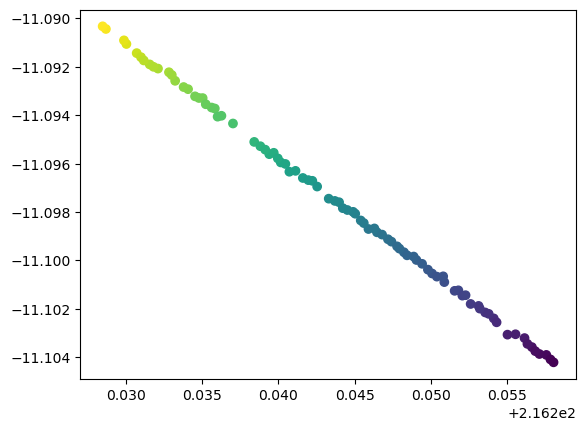

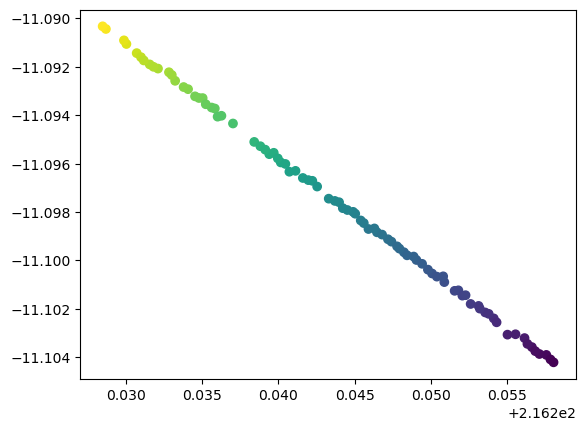

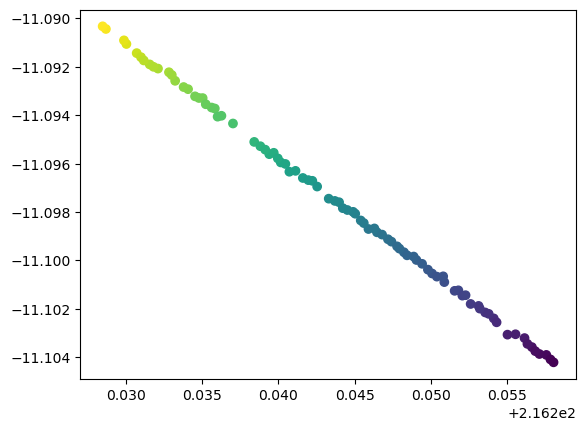

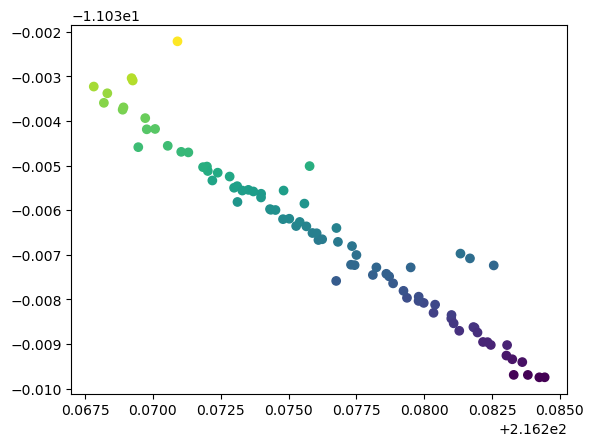

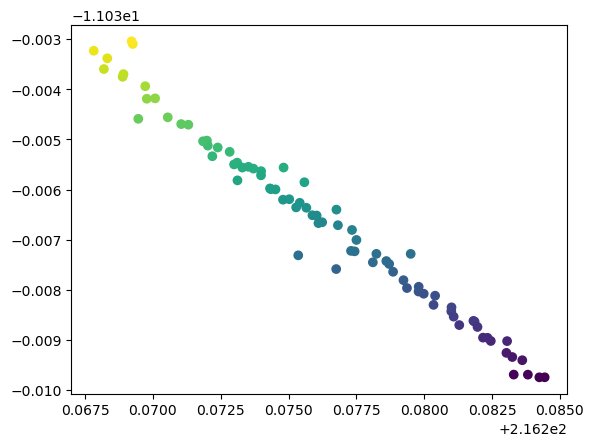

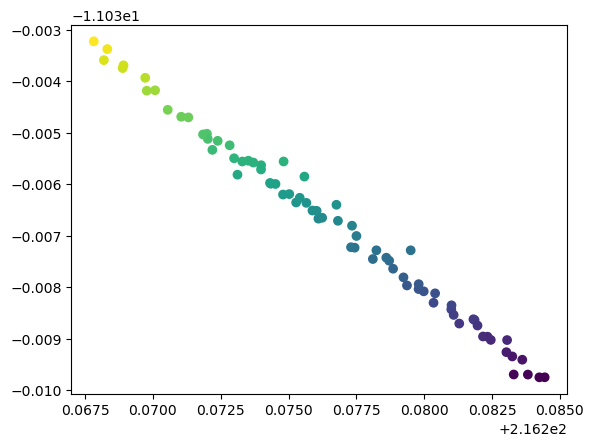

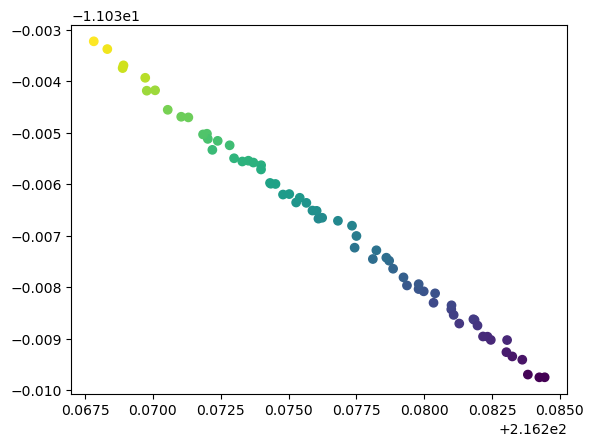

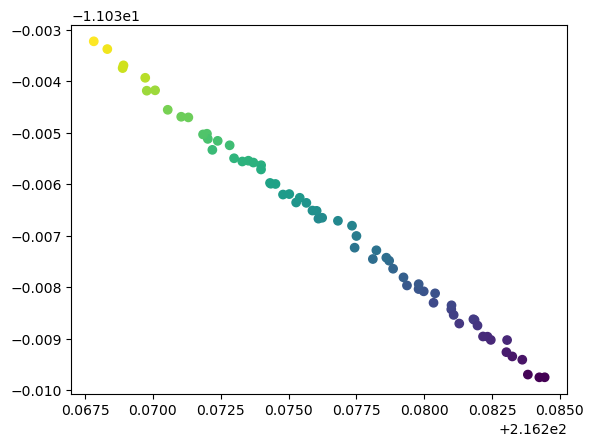

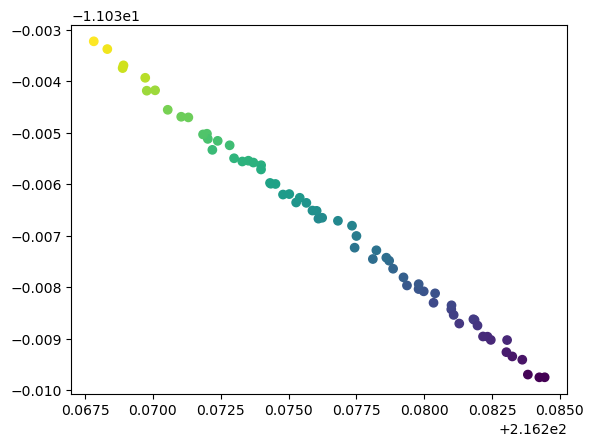

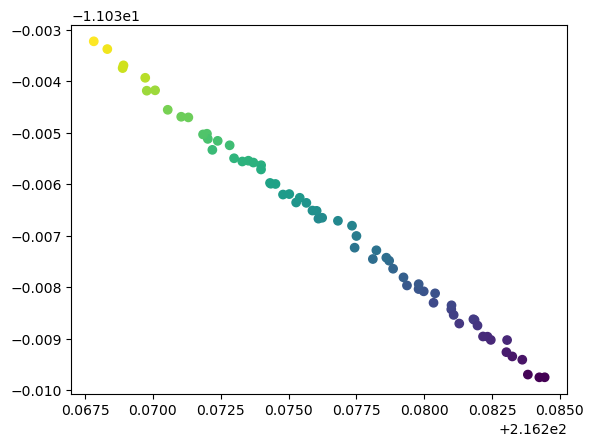

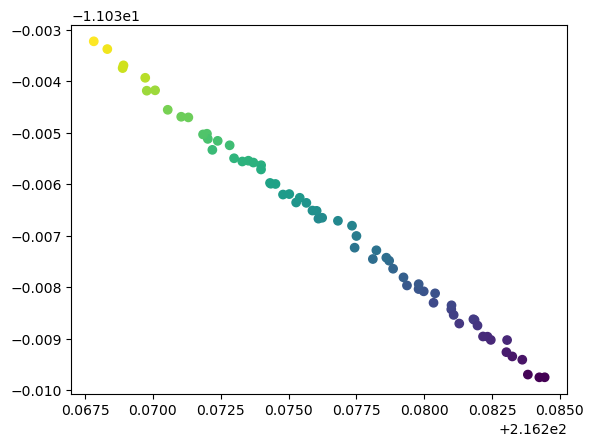

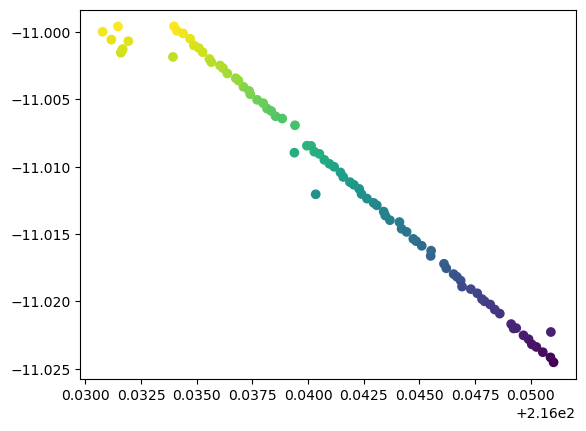

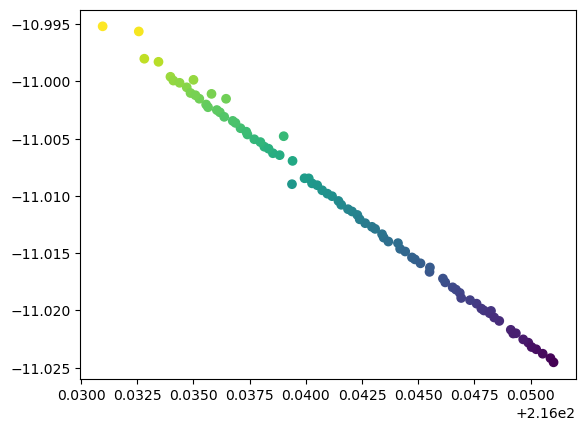

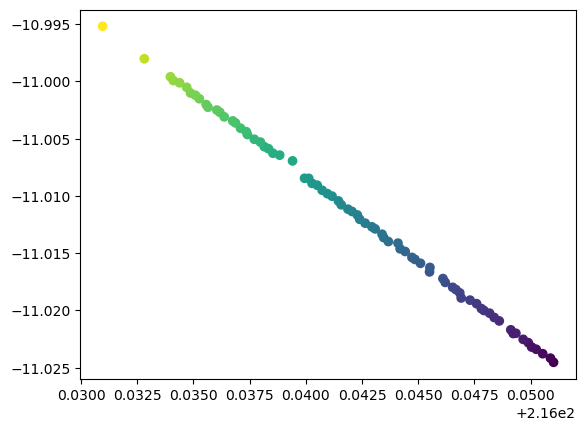

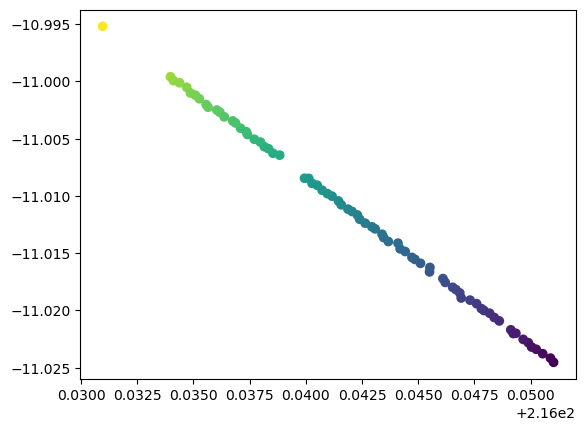

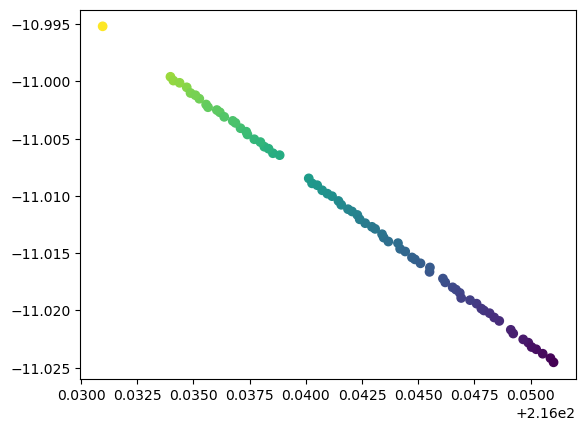

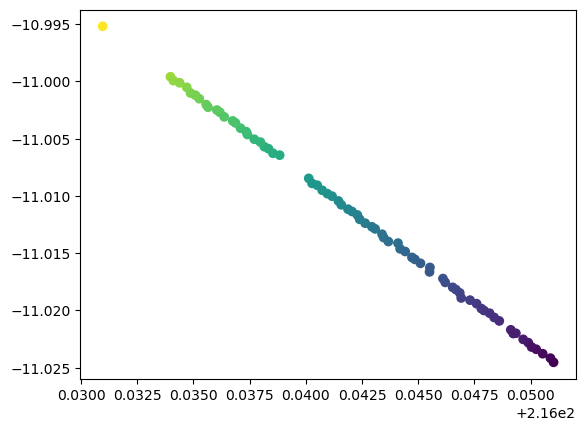

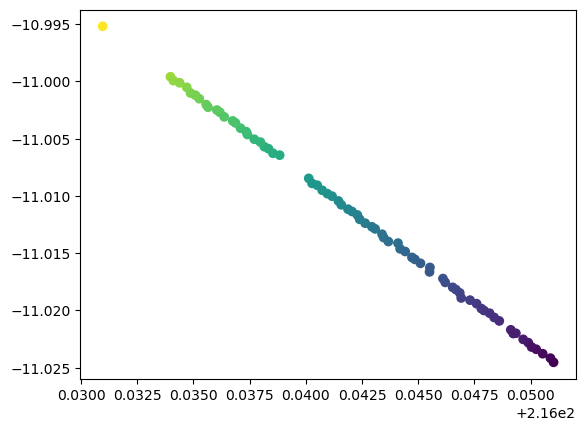

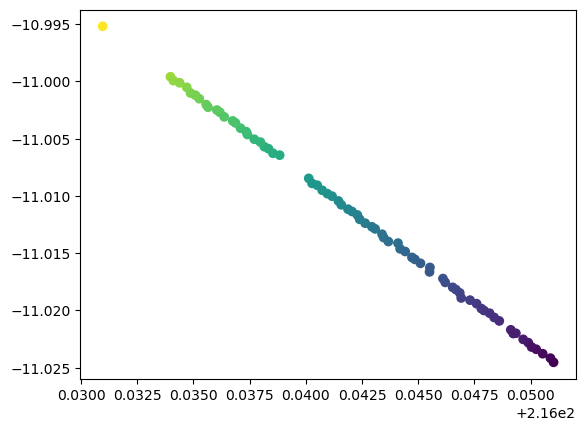

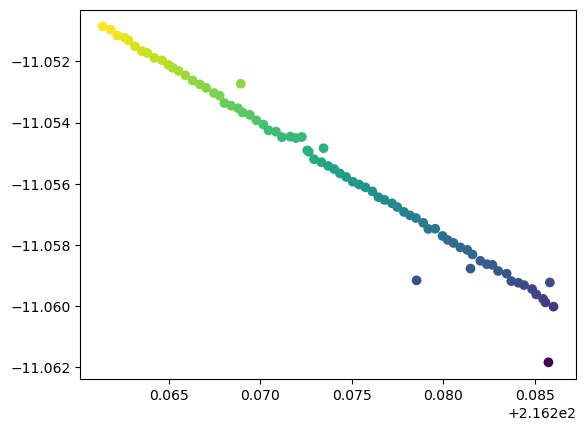

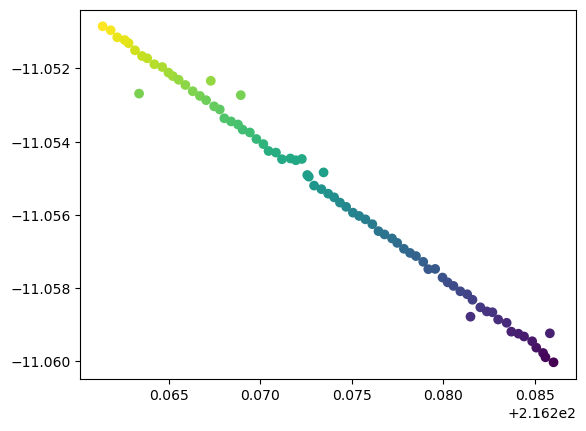

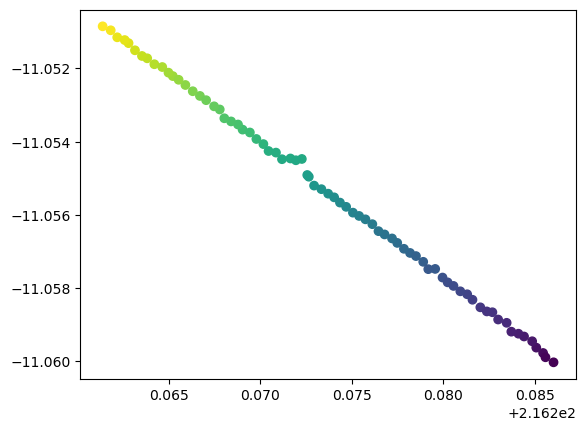

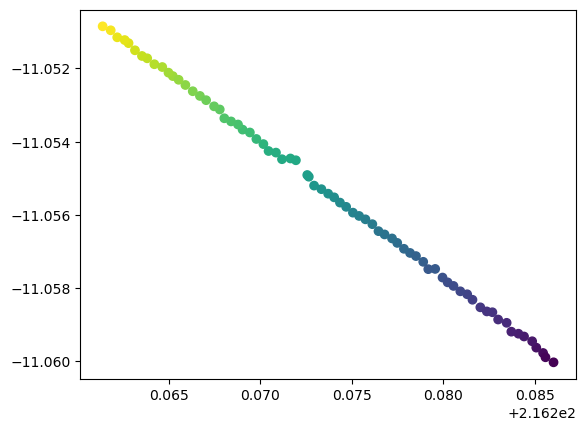

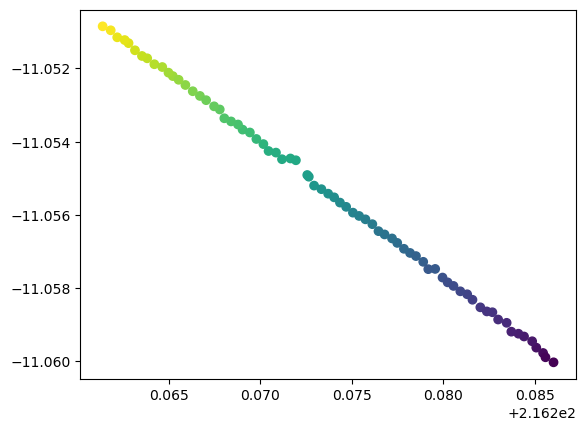

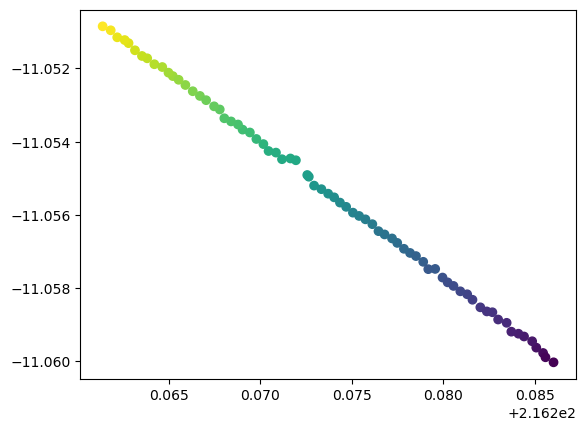

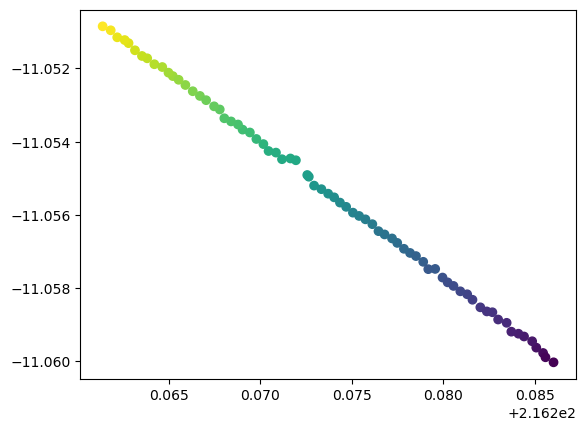

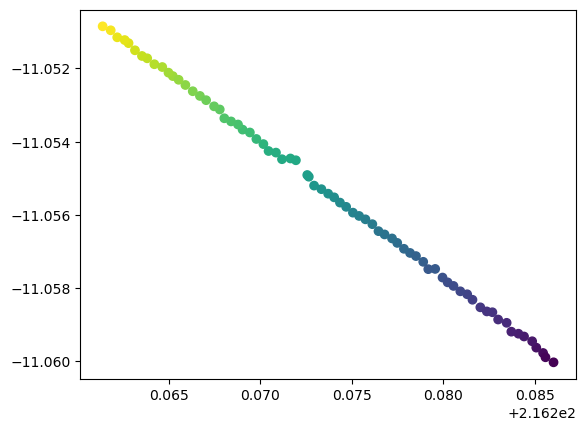

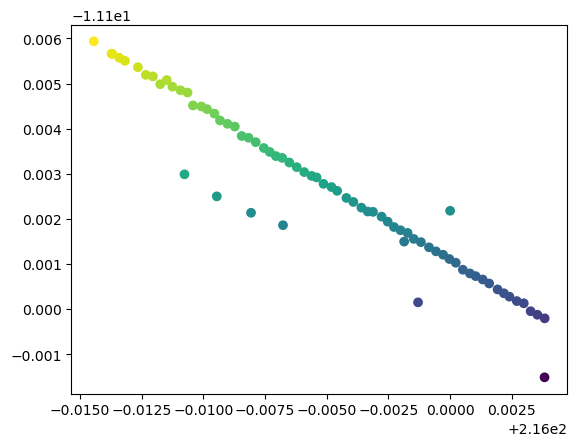

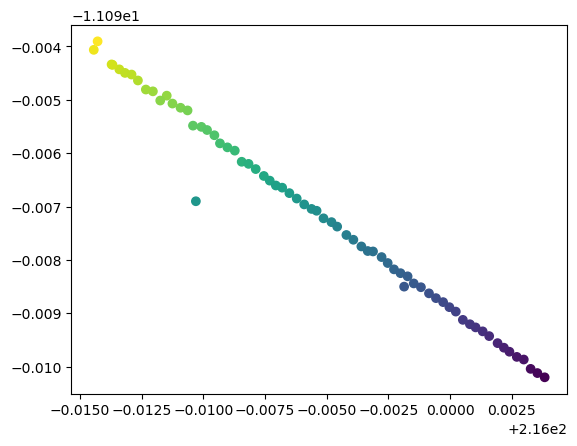

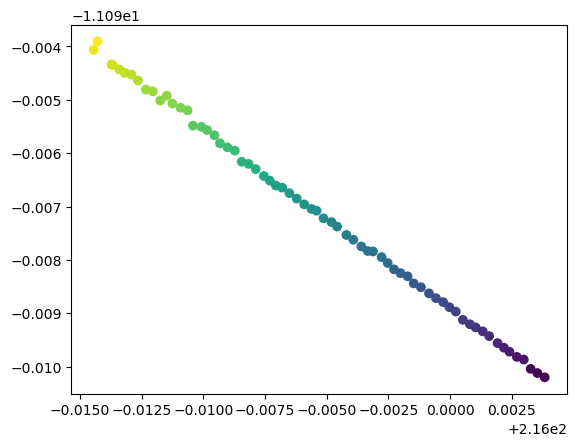

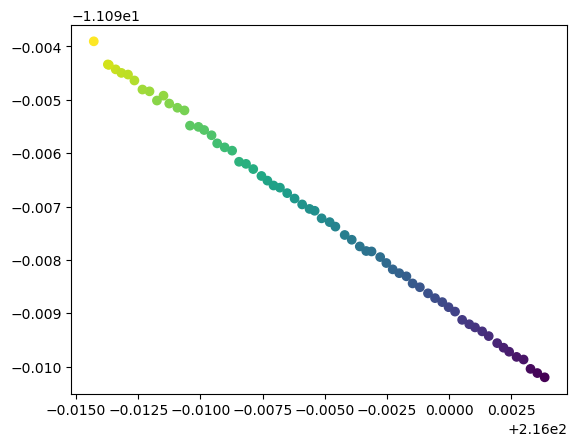

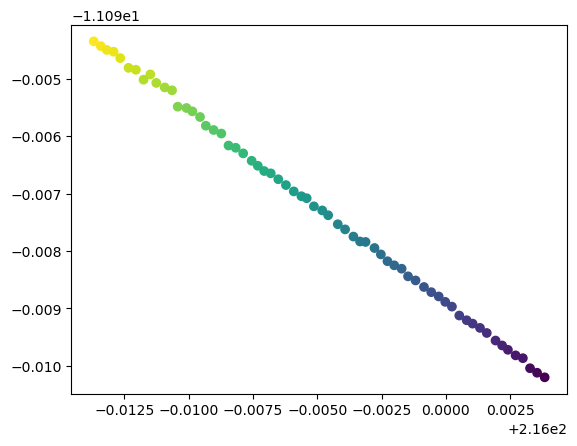

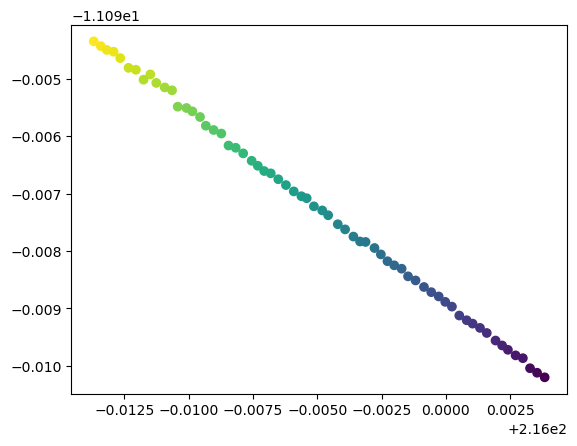

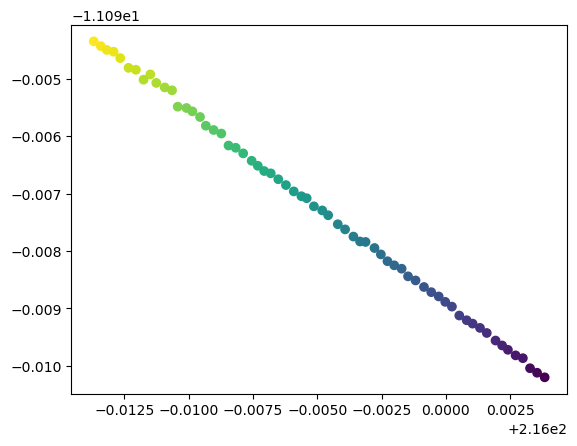

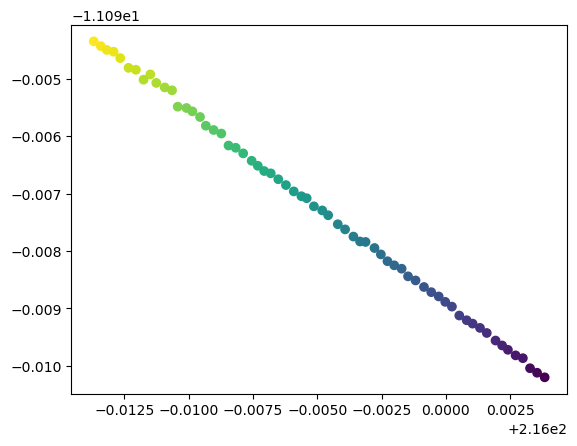

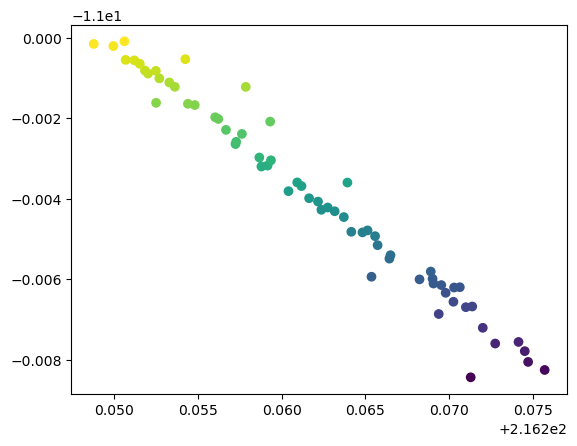

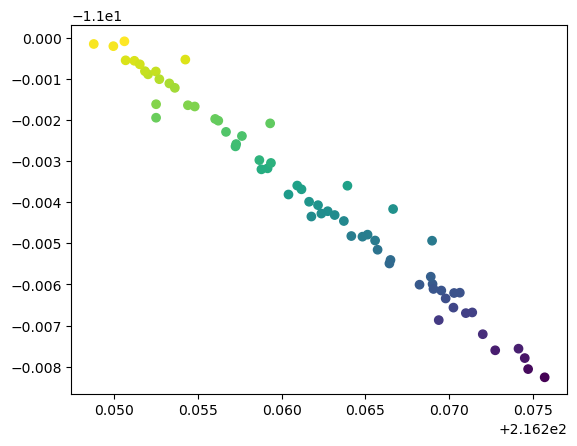

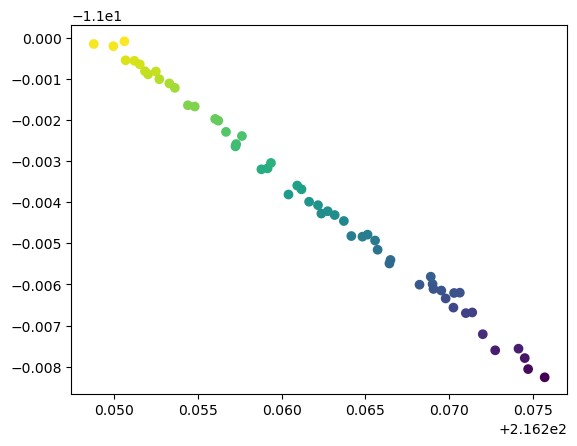

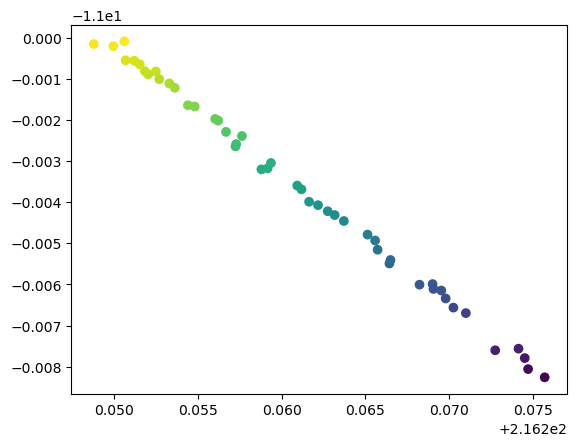

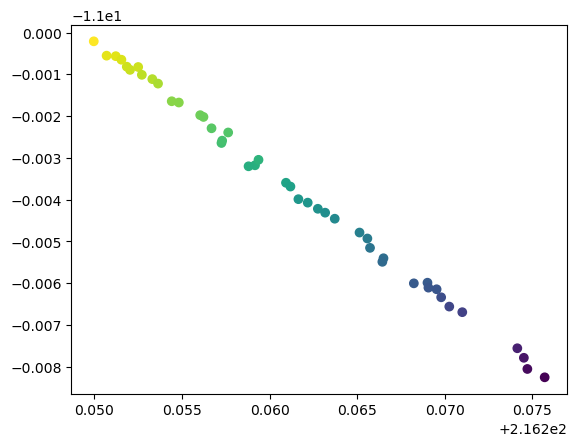

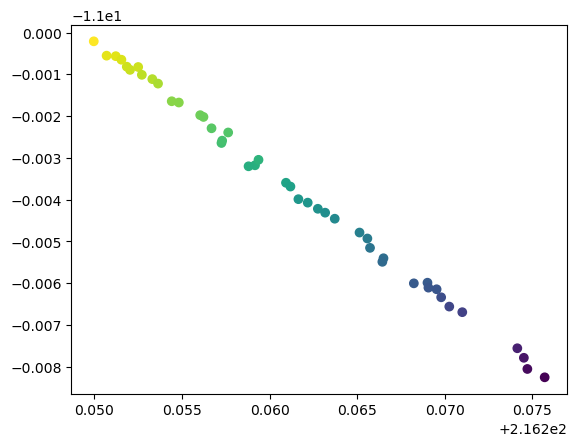

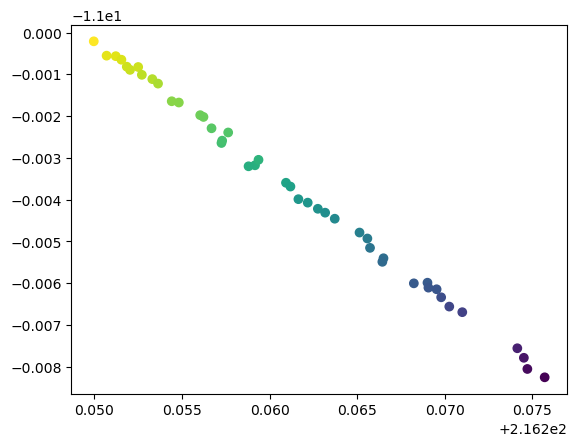

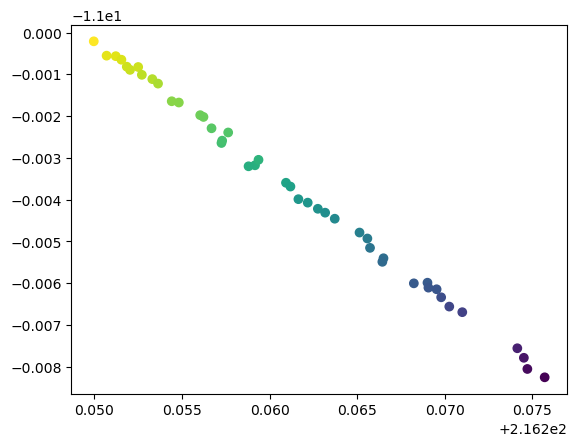

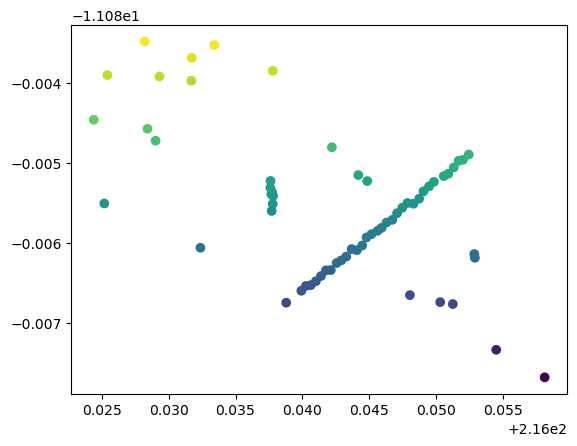

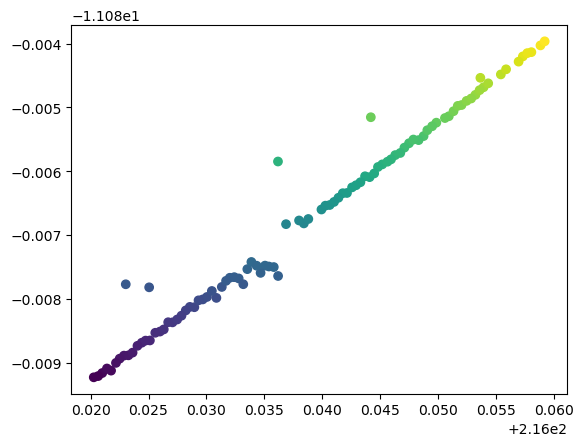

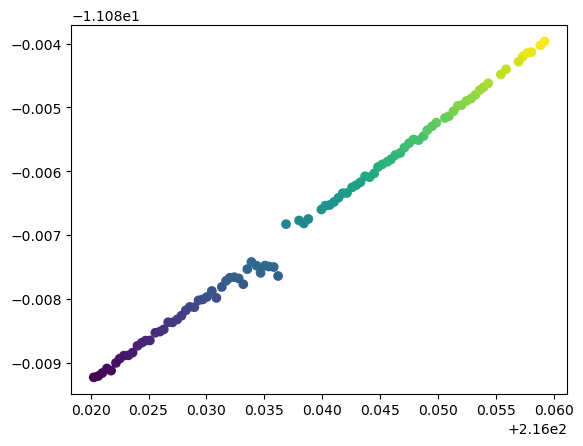

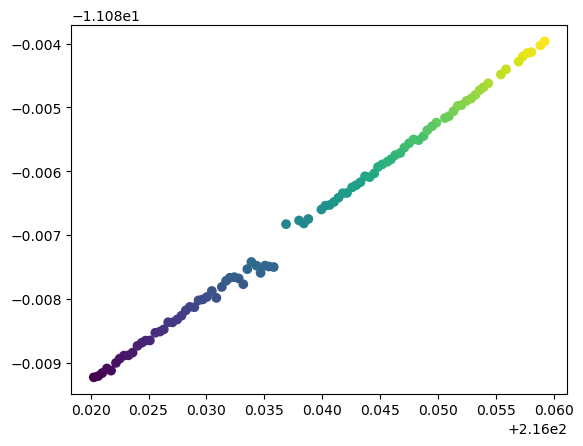

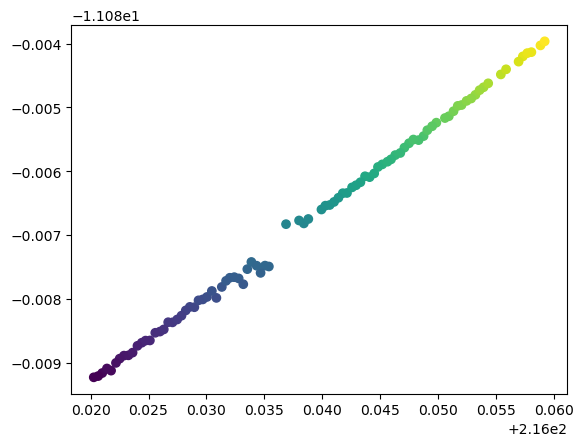

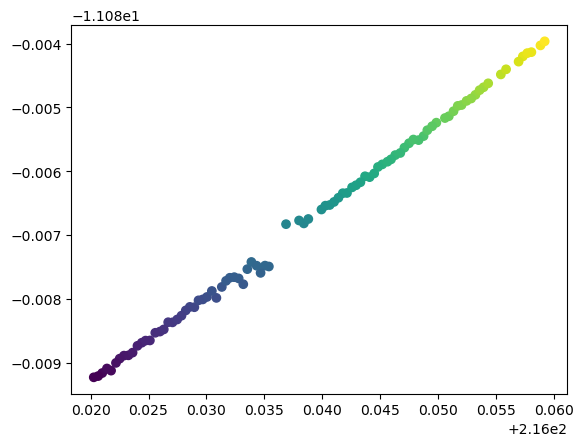

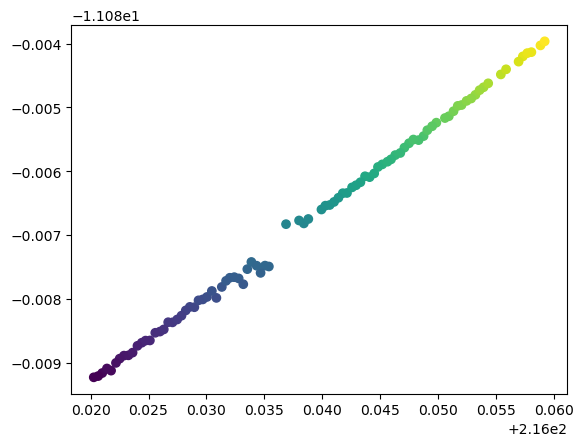

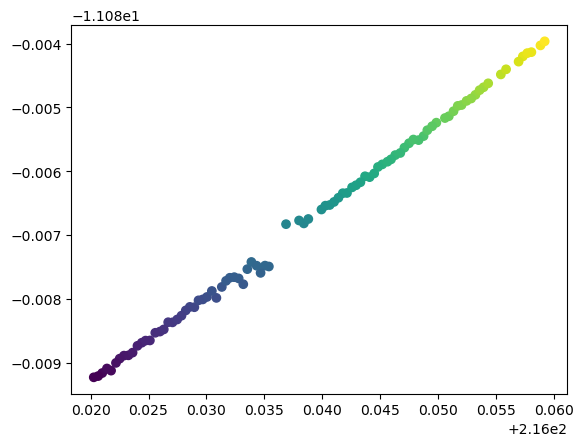

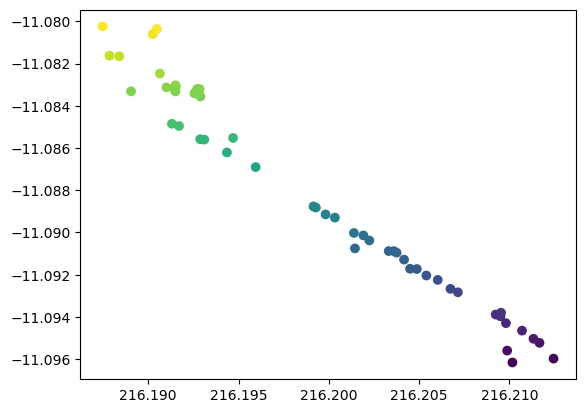

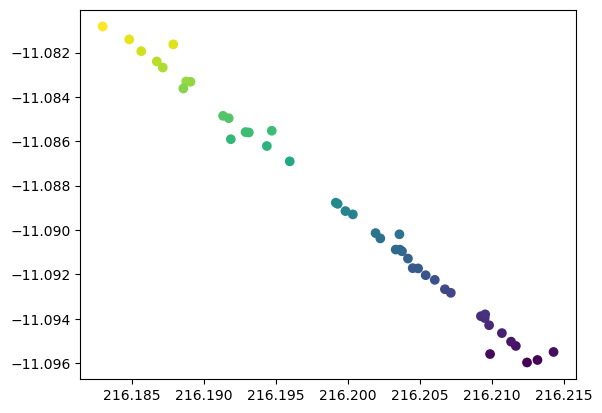

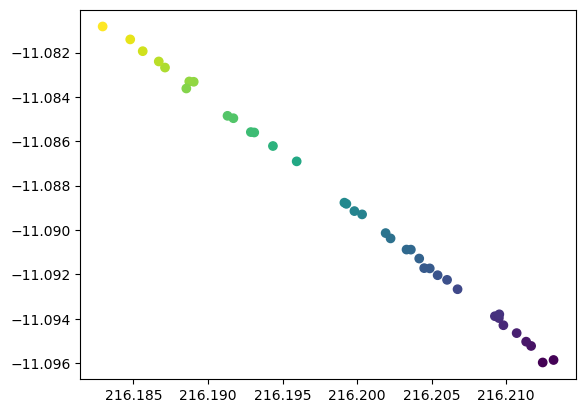

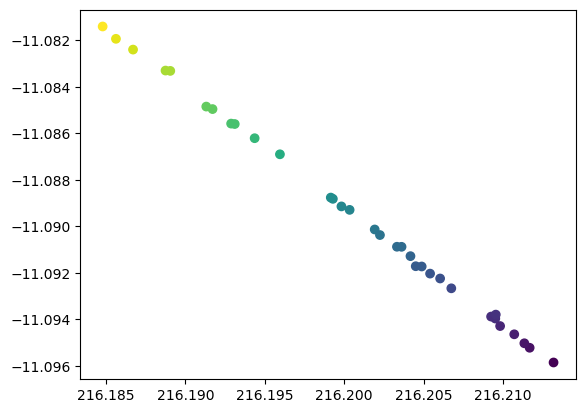

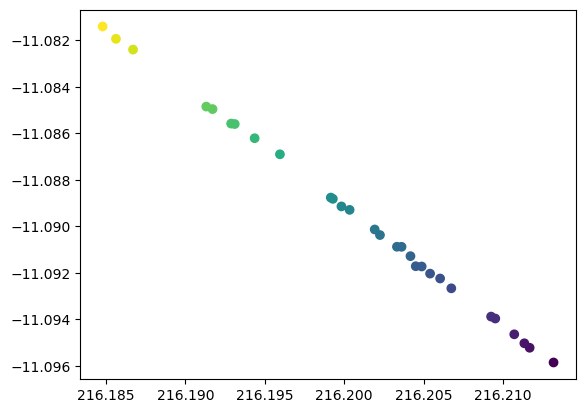

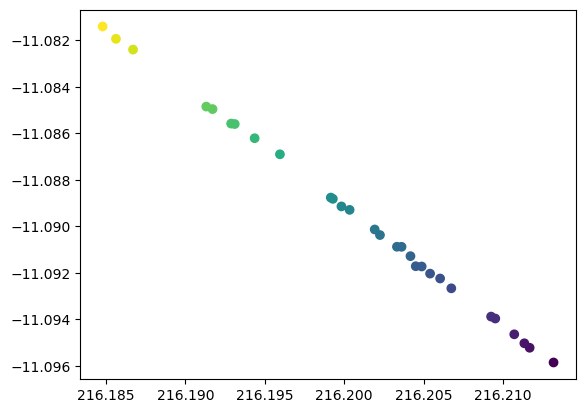

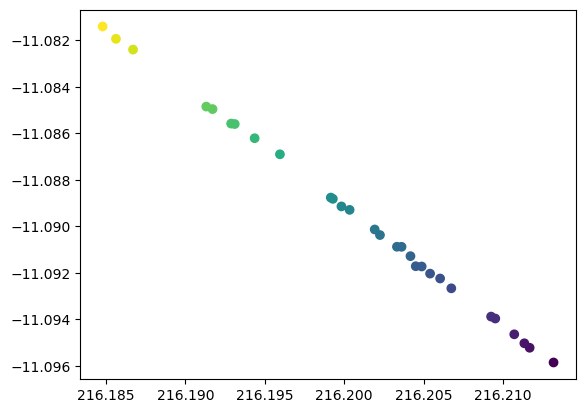

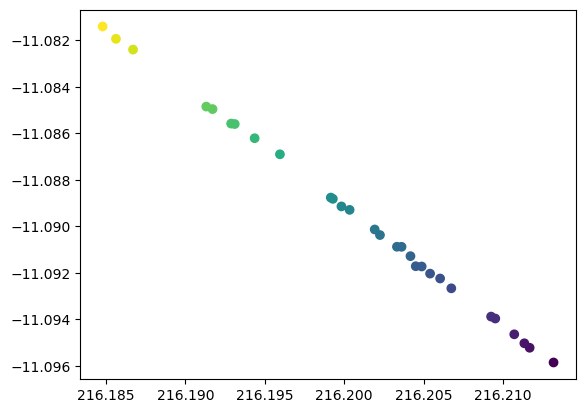

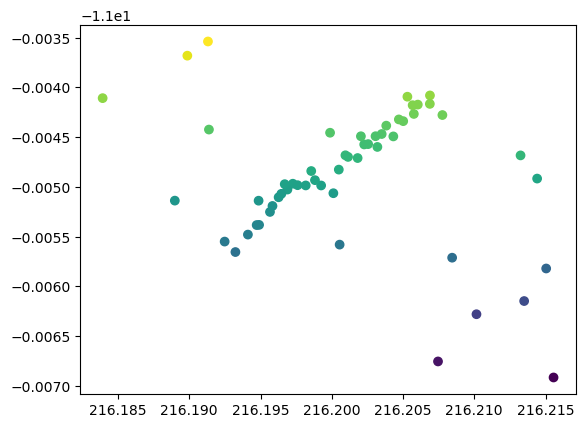

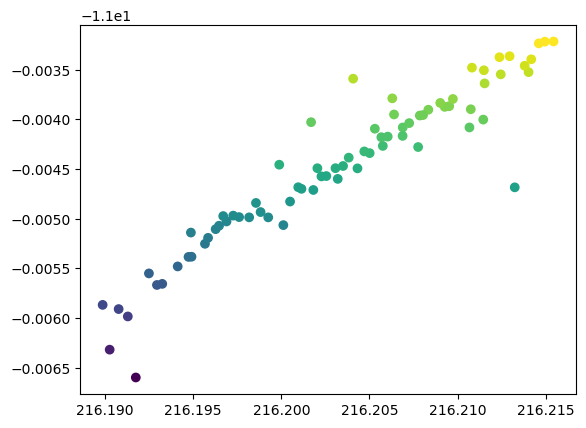

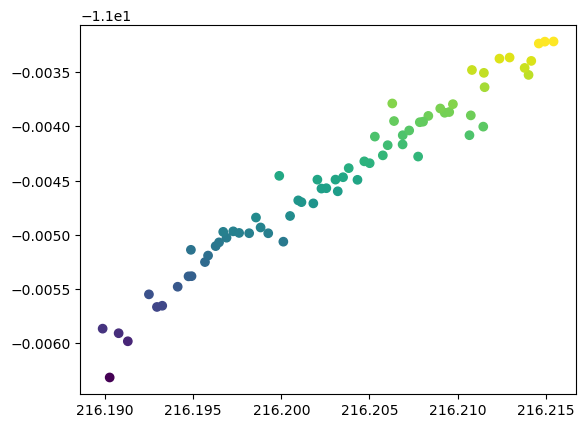

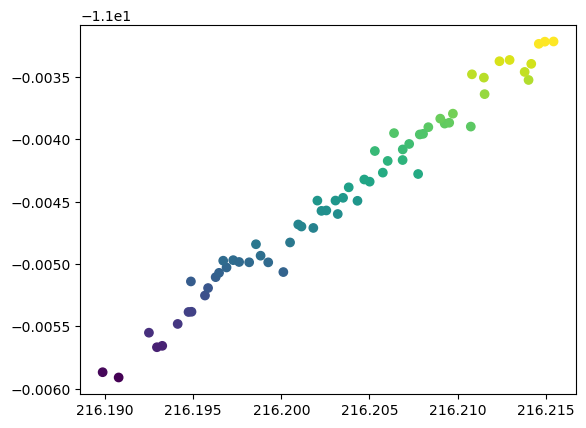

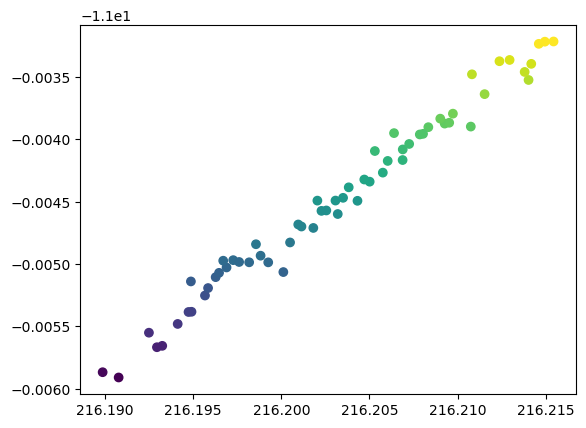

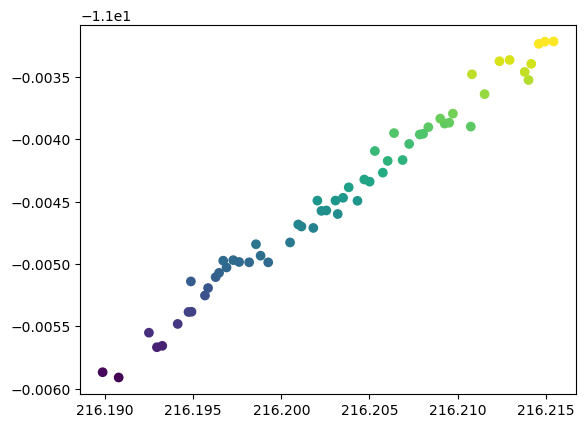

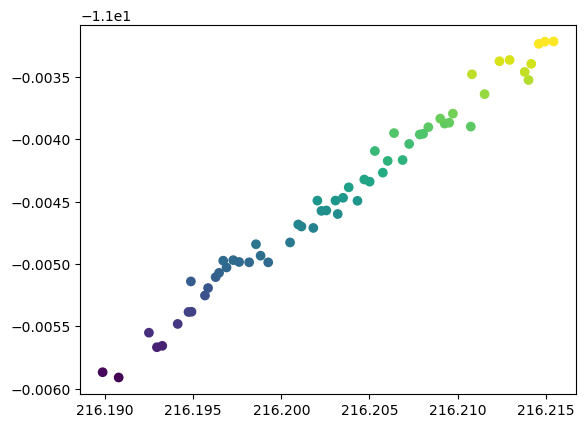

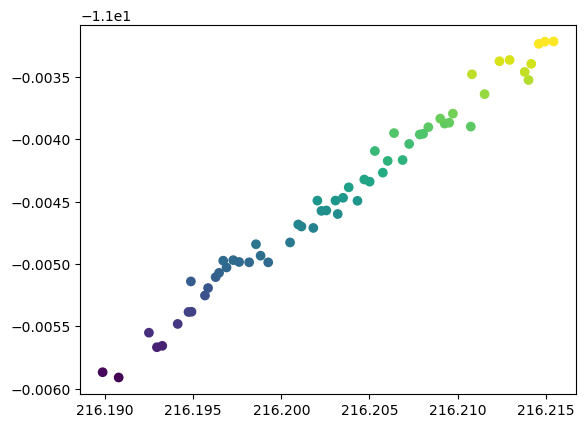

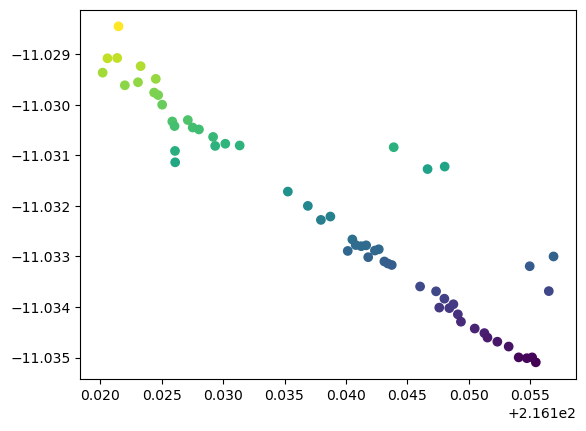

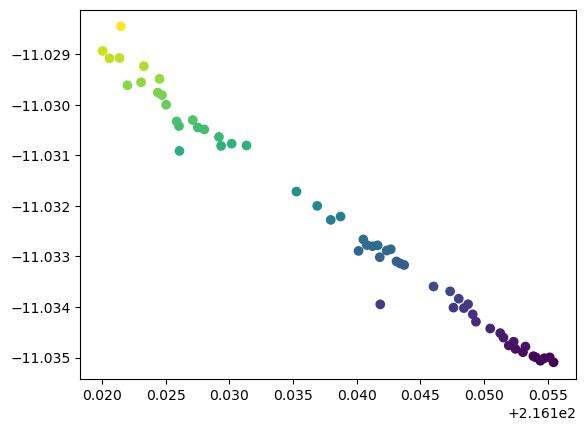

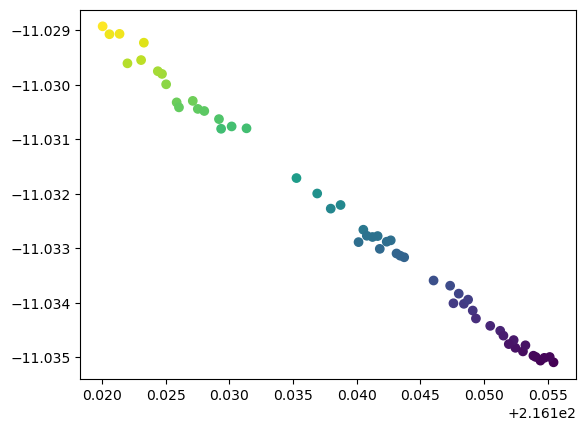

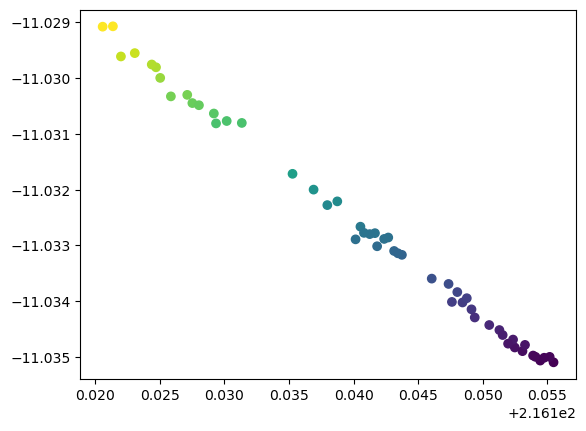

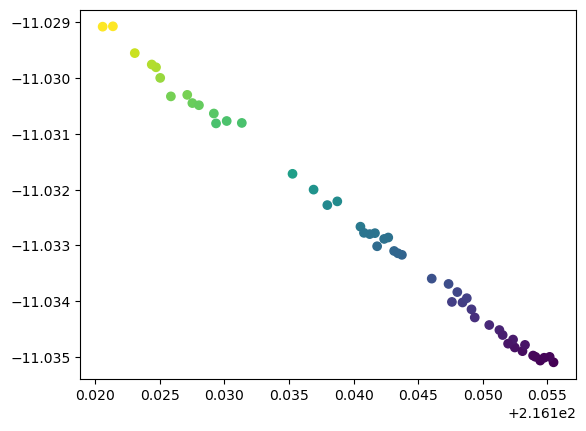

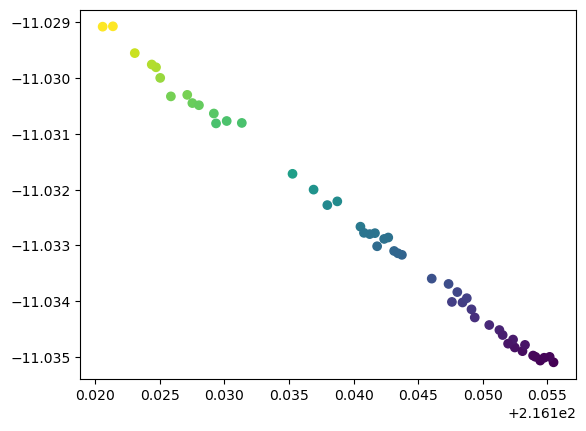

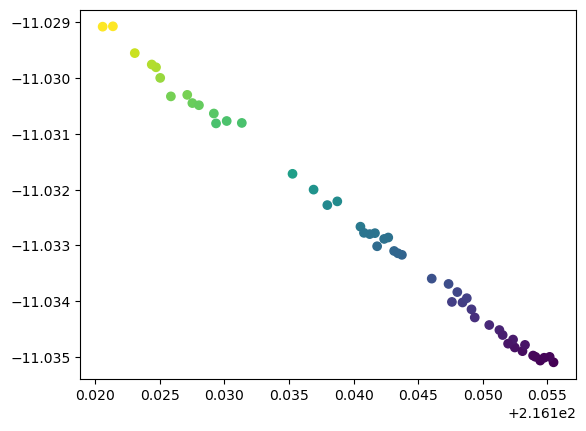

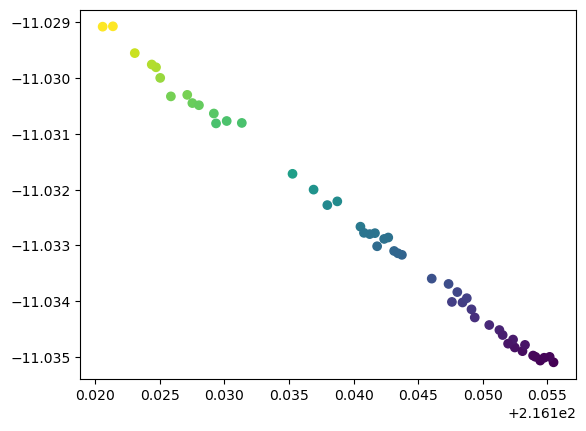

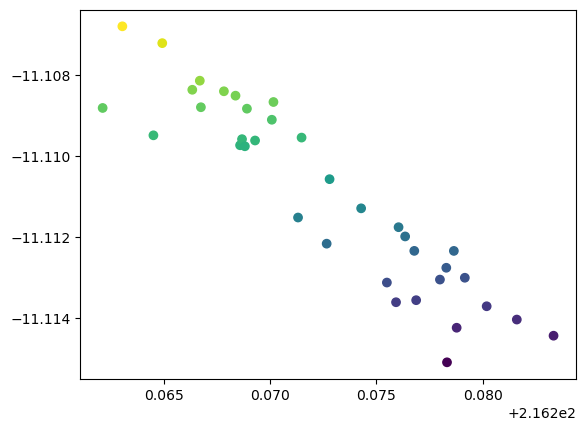

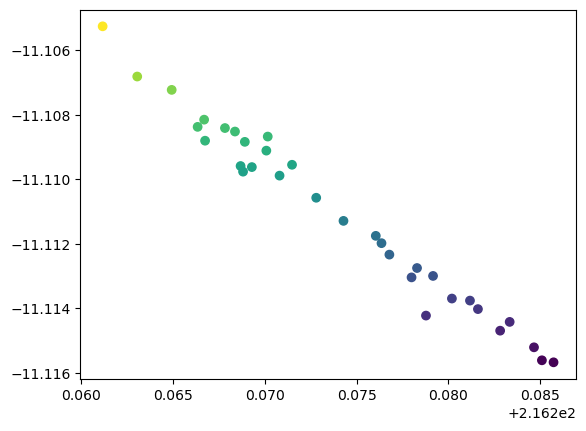

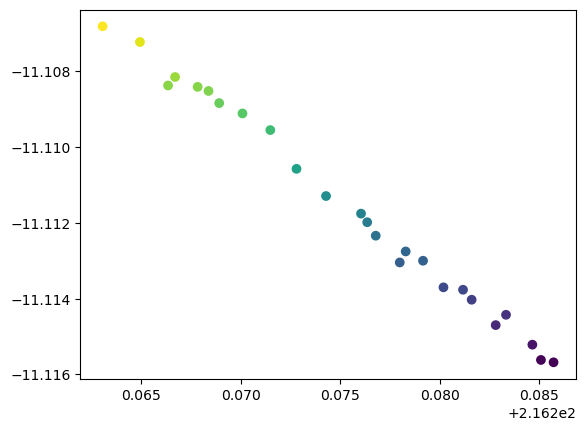

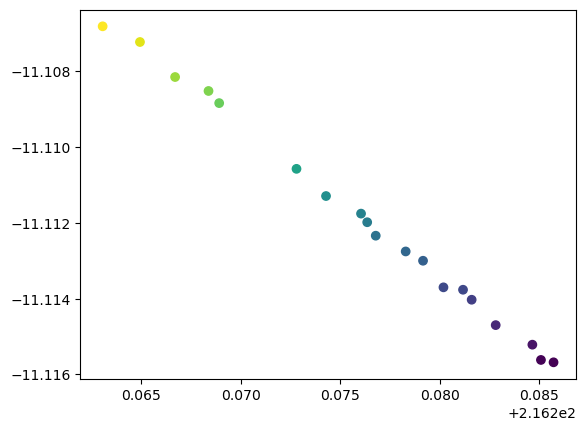

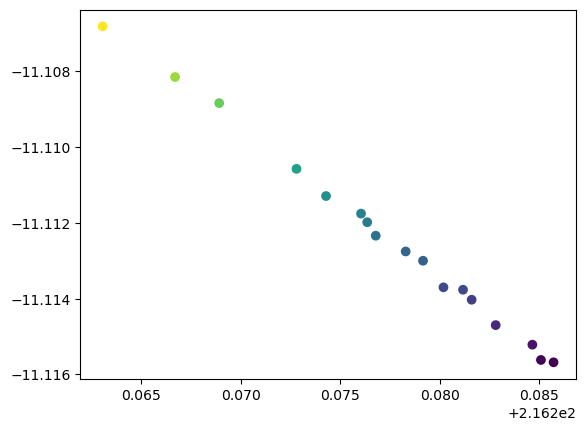

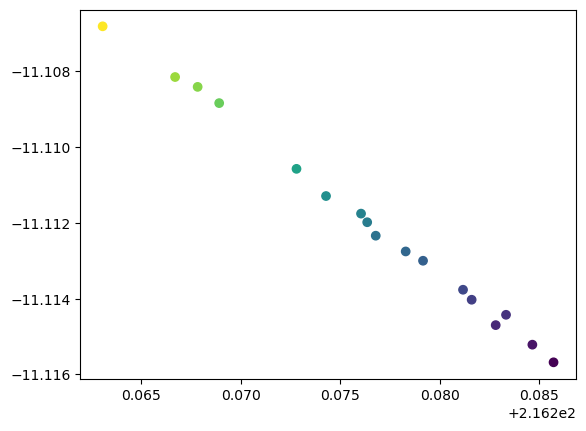

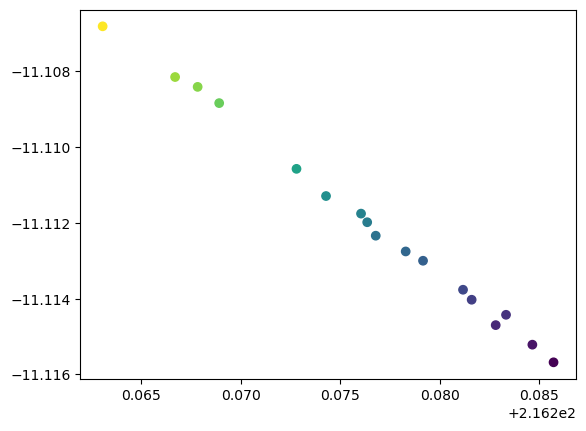

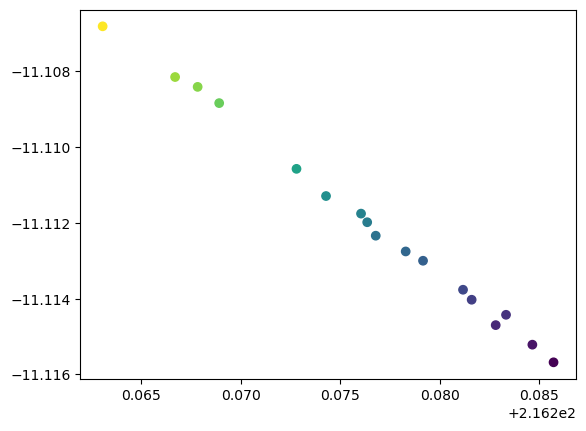

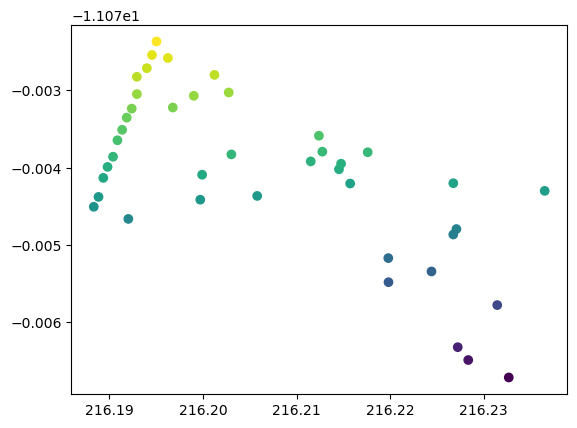

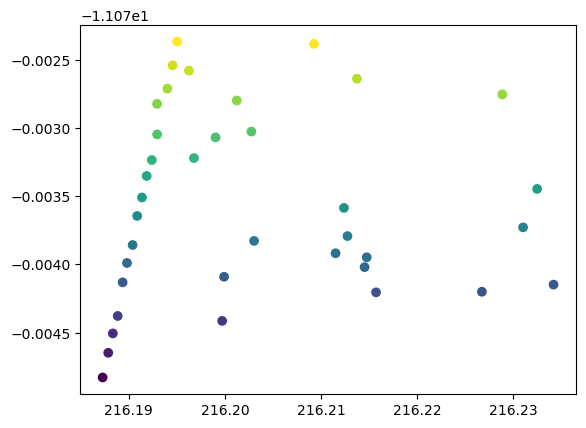

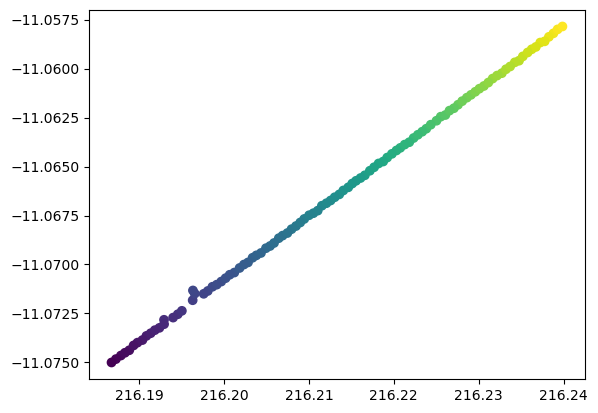

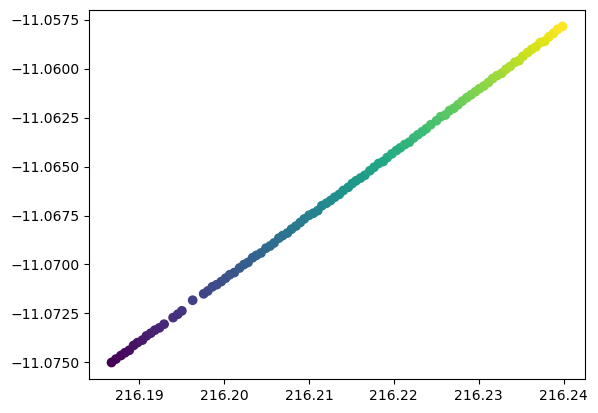

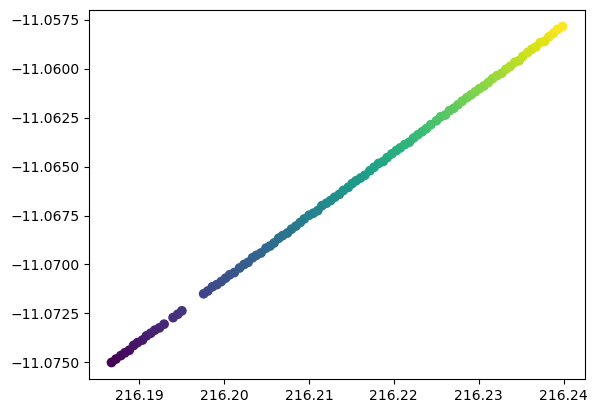

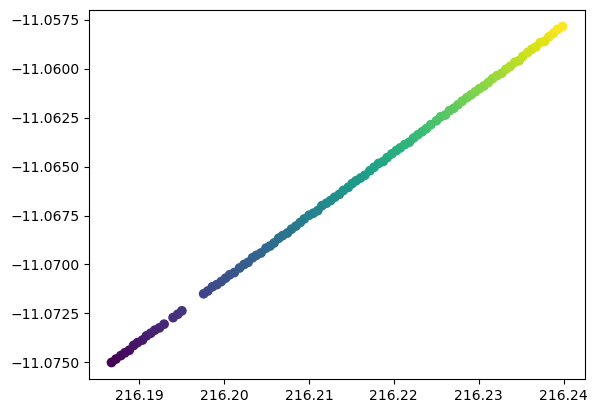

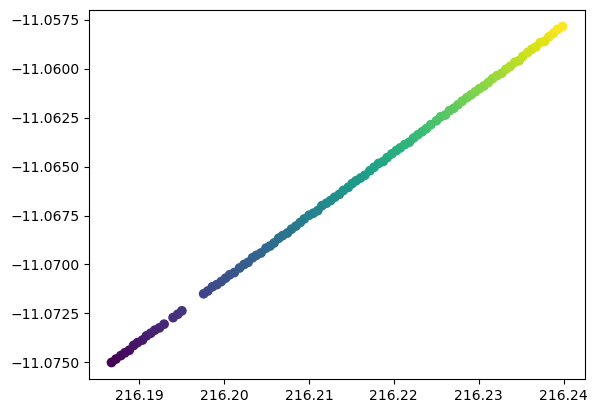

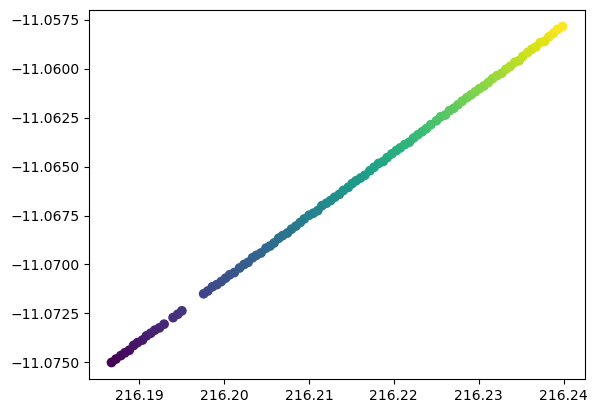

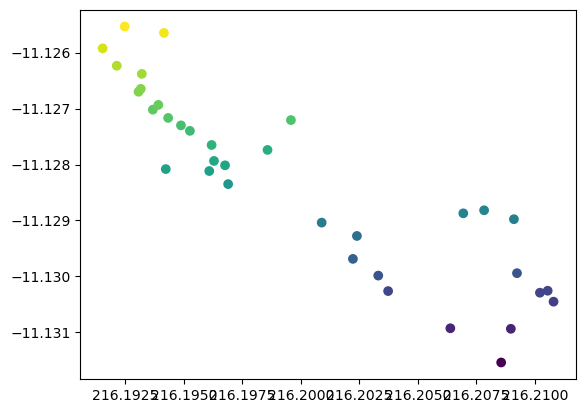

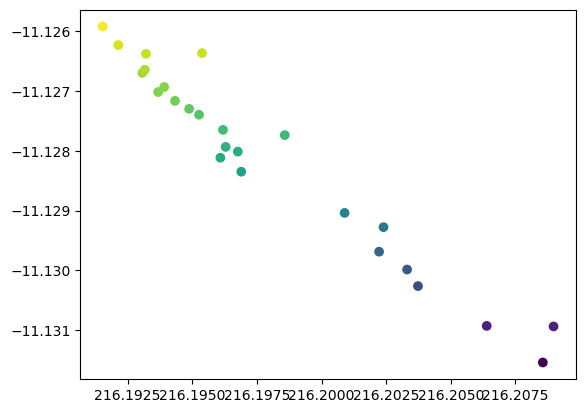

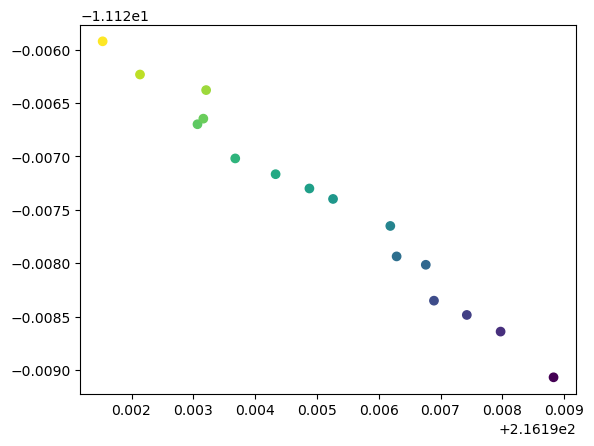

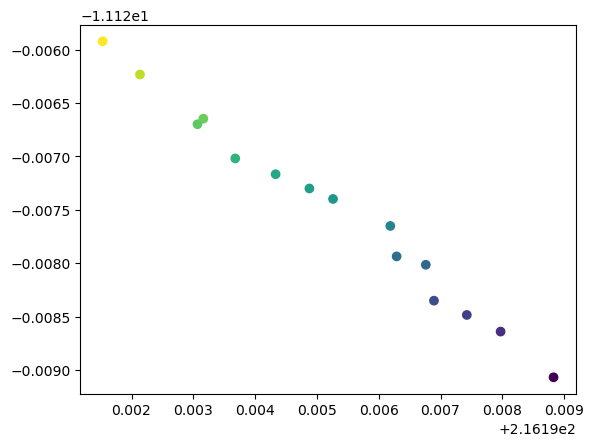

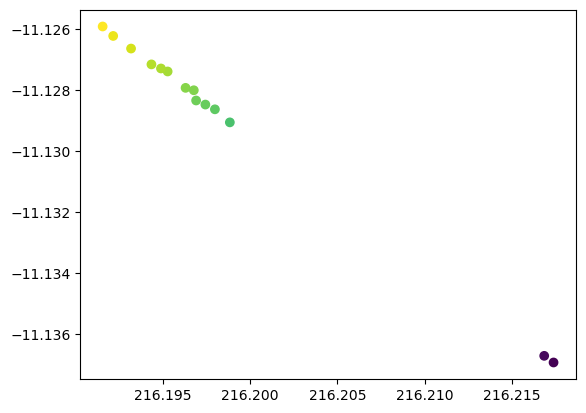

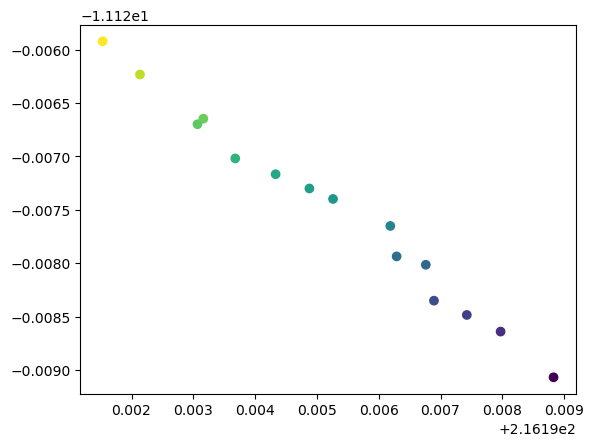

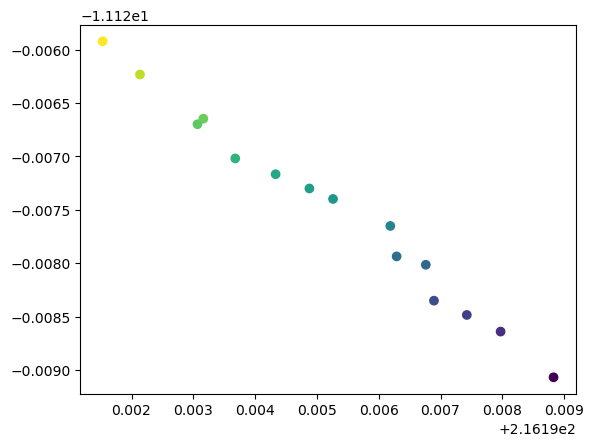

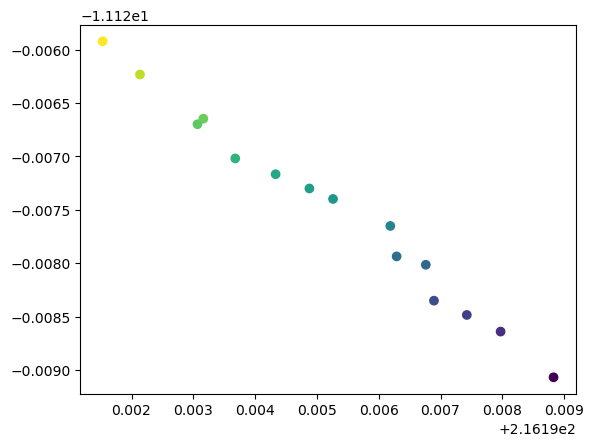

In [12]:
for k in clusters[-1].keys():
    for c in clusters:
        plt.scatter(c[k].points[:, 0], c[k].points[:, 1], c=c[k].points[:, 1])
        plt.show()